# Reconfiguration of Training Data

## Nitrate Input Data Setup 

In [1]:
import os

import numpy as np
import pandas as pd
import netCDF4 as nc
from netCDF4 import Dataset

In [6]:
emis_ctrl_2019_10 = pd.read_csv('/home/user/workdir/main/resources/ctrl/precursor_control_2019_o3.csv', index_col=0)
# emis_ctrl_2019_10['Boundary'] = 1.0
filtering_column = emis_ctrl_2019_10.columns[emis_ctrl_2019_10.columns.str.contains('NOX|VOC|NH3|O3')]
nitrate_data = emis_ctrl_2019_10[filtering_column]
nitrate_data

,A_VOC_ALL,A_NH3_ALL,A_O3_ALL,B_NOX_ALL,B_VOC_ALL,B_NH3_ALL,B_O3_ALL,C_NOX_ALL,C_VOC_ALL,C_NH3_ALL,...,O_NH3_ALL,O_O3_ALL,P_NOX_ALL,P_VOC_ALL,P_NH3_ALL,P_O3_ALL,Q_NOX_ALL,Q_VOC_ALL,Q_NH3_ALL,Q_O3_ALL
A_NOX_ALL,,,,,,,,,,,,,,,,,,,,,
1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0.863536,1.241056,0.833703,0.012559,0.869754,1.006564,0.962918,0.036505,1.068550,1.120954,1.238935,...,1.048698,0.029251,0.870206,1.121575,0.902626,0.032092,0.657383,1.010165,1.315283,0.028826
0.742006,0.646946,0.986340,0.014478,1.192631,1.003773,0.780494,0.036246,0.934012,0.969482,0.957689,...,0.943297,0.028404,1.278780,1.284151,1.433524,0.029280,1.120913,0.824734,1.290492,0.026995
1.242453,1.263960,0.903860,0.013236,0.955693,0.973506,0.906026,0.036542,0.823670,1.022233,1.065741,...,1.342453,0.027565,0.993028,1.163494,1.079287,0.030707,1.145995,1.265949,0.777755,0.026068
0.814413,0.735800,0.644385,0.016484,1.089342,1.144006,1.188025,0.036902,0.907913,0.796244,0.883310,...,1.027987,0.029576,1.094224,0.868594,0.953091,0.029506,1.196717,0.776720,1.122029,0.027315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.637726,1.277424,1.161813,0.015580,1.338111,0.680149,0.718203,0.036492,1.008044,0.912406,0.865273,...,0.822709,0.029915,0.898629,1.078804,1.119066,0.031780,1.270025,0.775742,0.922857,0.028282
0.964623,0.669842,1.231076,0.016992,0.848685,0.912572,1.086990,0.038051,1.286034,0.682843,1.020745,...,0.999586,0.032146,0.928756,0.873848,0.698095,0.031363,1.115707,1.026594,0.664581,0.030196
0.878997,1.100528,1.000417,0.013554,0.616271,0.970286,0.975696,0.036708,0.562368,1.261418,0.993182,...,0.599846,0.029236,1.132273,0.881093,0.863391,0.029496,1.264429,1.006009,1.170412,0.025938


In [7]:
# 필터링된 데이터프레임 저장
output_file_path = '/home/user/workdir/main/resources/ctrl/precursor_control_2019_3input_origin_o3.csv'
nitrate_data.to_csv(output_file_path)

print(f"Filtered data saved to {output_file_path}")

Filtered data saved to /home/user/workdir/main/resources/ctrl/precursor_control_2019_3input_origin_o3.csv


In [24]:
nit_data = pd.read_csv('/home/user/workdir/main/resources/ctrl/related_nitrate_PM25_2019.csv', index_col=0)
nit_data['Boundary'] = 1.0

In [27]:
ctrl_data = pd.concat([nit_data], axis=0)
ctrl_data = ctrl_data.reset_index(drop=True).values
nit_emis_data, nit_boundary_data = ctrl_data[:, :17*4], ctrl_data[:, 17*4]
nit_boundary_data

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Sulfate Input Data Setup 

In [4]:
'''
emis_ctrl_2019_10 = pd.read_csv('/home/user/workdir/main/resources/ctrl/precursor_control_2019.csv', index_col=0)
# emis_ctrl_2019_10['Boundary'] = 1.0
filtering_column = emis_ctrl_2019_10.columns[emis_ctrl_2019_10.columns.str.contains('SO2')]
sulfate_data = emis_ctrl_2019_10[filtering_column]
sulfate_data
'''

,A_SO2_ALL,B_SO2_ALL,C_SO2_ALL,D_SO2_ALL,E_SO2_ALL,F_SO2_ALL,G_SO2_ALL,H_SO2_ALL,I_SO2_ALL,J_SO2_ALL,K_SO2_ALL,L_SO2_ALL,M_SO2_ALL,N_SO2_ALL,O_SO2_ALL,P_SO2_ALL,Q_SO2_ALL
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.700099,0.796407,1.091637,1.096731,0.835844,1.117038,1.158107,0.830325,0.566807,1.103578,0.717624,1.077243,1.188704,1.159499,0.988029,0.941031,1.139638
3,0.983985,0.832971,0.888189,0.947942,0.732396,0.905111,1.133185,1.252111,1.074720,1.261725,1.244492,0.917365,0.989437,0.729895,1.231140,1.388193,0.763423
4,0.920476,1.146790,0.827747,1.025499,0.841434,1.076798,1.185959,1.360060,1.085012,1.110074,1.201728,0.931332,0.773078,1.330349,0.899459,1.011176,1.079256
5,1.074629,0.986736,0.938968,0.840765,1.148489,0.823102,0.933645,1.261402,1.398569,0.973882,0.999351,0.841211,1.331131,0.725756,0.662364,0.945197,1.317486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.623853,1.126068,1.037529,1.337277,0.841690,0.963157,1.158516,1.118346,1.140857,1.100192,1.390712,1.149951,0.678763,1.153066,0.940240,1.043560,1.163085
116,0.645136,0.920326,1.198476,1.167697,0.655815,0.955036,0.986789,0.800879,0.578229,1.351809,0.817947,1.155925,0.987916,0.868029,0.916433,0.698272,1.233914
117,0.964736,0.832265,0.584721,1.148662,1.227803,0.953151,1.119669,1.287741,1.343478,1.029109,0.669565,1.009388,1.106832,1.262327,0.584790,0.952019,0.935599
118,1.035694,0.882485,0.960801,1.152414,1.210033,1.034534,1.223421,1.301396,0.694237,0.816791,0.906857,0.808248,0.816863,0.992148,0.856549,1.017024,1.295791


In [5]:
'''
# 필터링된 데이터프레임 저장
output_file_path = '/home/user/workdir/main/resources/ctrl/related_sulfate_2019.csv'
sulfate_data.to_csv(output_file_path)

print(f"Filtered data saved to {output_file_path}")
'''

Filtered data saved to /home/user/workdir/main/resources/ctrl/related_sulfate_2019.csv


In [35]:
'''
sulf_data = pd.read_csv('/home/user/workdir/main/resources/ctrl/related_sulfate_2019.csv', index_col=0)
sulf_data['Boundary'] = 1.0
'''

In [36]:
'''
ctrl_data = pd.concat([sulf_data], axis=0)
ctrl_data = ctrl_data.reset_index(drop=True).values
sulf_emis_data, sulf_boundary_data = ctrl_data[:, :34], ctrl_data[:, 34]
sulf_boundary_data
'''

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Data setup based on 2013 data

In [32]:
emis_ctrl_2013_10 = pd.read_csv('/home/user/workdir/main/resources/ctrl/precursor_control_2013.csv', index_col=0)
filtering_column = emis_ctrl_2013_10.columns[emis_ctrl_2013_10.columns.str.contains('NOX|VOC|NH3|PM25')]
nitrate_data_2013 = emis_ctrl_2013_10[filtering_column]
nitrate_data_2013

,A_NOX_ALL,A_VOC_ALL,A_NH3_ALL,A_PM25_ALL,B_NOX_ALL,B_VOC_ALL,B_NH3_ALL,B_PM25_ALL,C_NOX_ALL,C_VOC_ALL,...,O_NH3_ALL,O_PM25_ALL,P_NOX_ALL,P_VOC_ALL,P_NH3_ALL,P_PM25_ALL,Q_NOX_ALL,Q_VOC_ALL,Q_NH3_ALL,Q_PM25_ALL
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.871163,1.241296,1.241296,0.837620,0.869528,1.008703,1.008703,0.962915,1.069482,1.121791,...,0.843612,1.048691,0.866257,1.120186,1.120186,0.902149,0.671272,1.024438,1.024438,1.328682
3,0.734821,0.647231,0.647231,0.982618,1.188854,1.000202,1.000202,0.780403,0.934322,0.970853,...,0.933085,0.943158,1.278162,1.284456,1.284456,1.433464,1.127691,0.865993,0.865993,1.294374
4,1.234901,1.263537,1.263537,0.900073,0.955756,0.971038,0.971038,0.906025,0.822588,1.021625,...,1.388077,1.342633,0.991836,1.163405,1.163405,1.079142,1.140885,1.275085,1.275085,0.767802
5,0.806340,0.734720,0.734720,0.640250,1.090280,1.147626,1.147626,1.188045,0.903381,0.795477,...,1.289247,1.028036,1.093813,0.869924,0.869924,0.953224,1.194511,0.770811,0.770811,1.123753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.649676,1.279131,1.279131,1.167864,1.334521,0.679807,0.679807,0.718116,1.013591,0.912491,...,0.829789,0.822512,0.902038,1.079737,1.079737,1.119276,1.264937,0.790256,0.790256,0.921121
116,0.974798,0.671351,0.671351,1.236281,0.850271,0.916459,0.916459,1.087031,1.288380,0.684121,...,0.916096,0.999624,0.931988,0.875252,0.875252,0.698483,1.104828,0.995660,0.995660,0.653914
117,0.886244,1.100741,1.100741,1.004096,0.619206,0.974206,0.974206,0.975765,0.567845,1.263578,...,1.068169,0.599868,1.127766,0.879320,0.879320,0.863123,1.264807,1.031716,1.031716,1.178222
118,0.892489,0.816186,0.816186,0.881785,0.916137,0.945854,0.945854,1.115611,0.964840,0.958346,...,1.178658,0.850008,0.974250,1.112362,1.112362,0.992612,1.252752,1.158895,1.158895,1.272655


In [33]:
# 필터링된 데이터프레임 저장
output_file_path = '/home/user/workdir/main/resources/ctrl/related_nitrate_PM25_2013.csv'
nitrate_data_2013.to_csv(output_file_path)

print(f"Filtered data saved to {output_file_path}")

Filtered data saved to /home/user/workdir/main/resources/ctrl/related_nitrate_PM25_2013.csv


# O3 Input Data 

In [78]:
import os
base_path_2019 = '/home/user/workdir/main/datasets/concentration/2019/'
conc_path = []
for i in range(1, 120): conc_path.append(os.path.join(base_path_2019, '1.00', f'ACONC.{i}'))

conc_data = []
for path in conc_path:
    with nc.Dataset(path) as f:
        conc_data.append(f.variables['O3'][:].data.squeeze())

In [79]:
import pandas as pd

def get_korea_city_info():
    city_names = [
        'Seoul', 'Incheon', 'Busan', 'Daegu', 'Gwangju', 'Gyeonggi',
        'Gangwon', 'Chung-Buk', 'Chung-Nam', 'Gyeong-Buk', 'Gyeong-Nam',
        'Jeon-Buk', 'Jeon-Nam', 'Jeju', 'Daejeon', 'Ulsan', 'Sejong']
    grid_info = pd.read_csv('/home/user/workdir/cmaqnet-main/resources/geom/grid_allocation.csv')
    city_info_grid = {}
    for city in city_names:
        region =  grid_info[grid_info['Region_Name']==city]
        region_grid = region.loc[:, ['Row', 'Column']] - 1
        city_info_grid[city] = region_grid.values
    return city_info_grid

def get_annual_mean(preds, city_index=get_korea_city_info):
    preds_arr = np.array(preds).reshape(-1, 82, 67)
    city_mean = {city: None for city in city_index}
    for city, grid_index in city_index.items():
        row, col = grid_index.T
        city_conc = preds_arr[:, row, col].mean(axis=1)
        city_mean[city] = city_conc
    return city_mean

In [ ]:
city_index = get_korea_city_info()
region_mean = get_annual_mean(conc_data, city_index)
region_mean_df = pd.DataFrame(region_mean)
region_mean_df.to_csv('/home/user/workdir/o3_1.0_mean.csv', index=False)

In [ ]:
import pandas as pd

# (1) o3_1.0_mean.csv 읽기
df_o3 = pd.read_csv('/home/user/workdir/o3_1.0_mean.csv')  
#  - index_col=None (기본)라면 맨 왼쪽에 unnamed index 열이 붙지 않고, 
#    첫 번째 행이 컬럼으로 인식될 것입니다.

# (2) 지역명 → A_O3_ALL 등으로 매핑 딕셔너리 준비
region_map = {
    'Seoul':     'A_O3_ALL',
    'Incheon':   'B_O3_ALL',
    'Busan':     'C_O3_ALL',
    'Daegu':     'D_O3_ALL',
    'Gwangju':   'E_O3_ALL',
    'Gyeonggi':  'F_O3_ALL',
    'Gangwon':   'G_O3_ALL',
    'Chung-Buk': 'H_O3_ALL',
    'Chung-Nam': 'I_O3_ALL',
    'Gyeong-Buk':'J_O3_ALL',
    'Gyeong-Nam':'K_O3_ALL',
    'Jeon-Buk':  'L_O3_ALL',
    'Jeon-Nam':  'M_O3_ALL',
    'Jeju':      'N_O3_ALL',
    'Daejeon':   'O_O3_ALL',
    'Ulsan':     'P_O3_ALL',
    'Sejong':    'Q_O3_ALL'
}

# (3) rename()을 써서 컬럼명 변경
df_o3_renamed = df_o3.rename(columns=region_map)

# (4) 원한다면 csv로 임시 저장(검증 목적)
df_o3_renamed.to_csv('/home/user/workdir/o3_1.0_mean_renamed.csv', index=False)
# --- 

In [56]:
# df_o3_renamed = pd.read_csv('/home/user/workdir/o3_1.0_mean_renamed.csv')
# df_o3_renamed = pd.read_csv('/home/user/workdir/main/normal_o3.csv')
df_o3_renamed = pd.read_csv('/home/user/workdir/main/scaled_o3.csv')
if 'Unnamed: 0' in df_o3_renamed.columns:
    df_o3_renamed.drop(columns=['Unnamed: 0'], inplace=True)
df_pre = pd.read_csv('/home/user/workdir/main/resources/ctrl/precursor_control_2019.csv')

pre_cols = df_pre.columns.tolist()
# 예) ['A_NOX_ALL','A_SO2_ALL','A_NH3_ALL','A_VOC_ALL','A_PM25_ALL',
#      'B_NOX_ALL','B_SO2_ALL','B_NH3_ALL','B_VOC_ALL','B_PM25_ALL', ... ]

# 지역 목록(17개) → A~Q
regions = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q"]

# (5) 각 지역별로 '~~_PM25_ALL' 뒤에 '~~_O3_ALL' 컬럼을 삽입
for region in regions:
    # (a) 삽입할 새로운 컬럼 이름
    new_col = f"{region}_O3_ALL"  # 예: 'A_O3_ALL'
    
    # (b) precursor에서 'region_PM25_ALL' 컬럼 인덱스 찾기
    pm25_col = f"{region}_PM25_ALL"
    if pm25_col not in pre_cols:
        # 만약 precursor에 해당 PM25컬럼이 없으면 스킵 or 에러 처리
        print(f"Warning: {pm25_col} not found in precursor columns.")
        continue
    
    idx_pm25 = pre_cols.index(pm25_col)  # PM25 컬럼의 위치(정수)
    
    # (c) PM25 바로 뒤에 삽입할 위치 = idx_pm25 + 1
    insert_pos = idx_pm25 + 1
    
    # (d) O3 데이터( df_o3_renamed[new_col] )를 df_pre에 컬럼으로 삽입
    #     - np.array 길이(=119)와 df_pre의 행 수가 같아야 함
    df_pre.insert(
        loc = insert_pos,           # 삽입할 열 위치
        column = new_col,           # 새 컬럼명
        value = df_o3_renamed[new_col].values  # 오존 데이터 Series(또는 array)
    )
    
    # (e) pre_cols 리스트에도 새 컬럼명을 같은 위치에 삽입
    pre_cols.insert(insert_pos, new_col)

# (6) 저장
df_pre.iloc[0] = 1
if 'Unnamed: 0' in df_pre.columns:
    df_pre.drop(columns=['Unnamed: 0'], inplace=True)
df_pre.to_csv('/home/user/workdir/precursor_control_2019_with_scaled_o3.csv', index=False)
df_pre

,A_NOX_ALL,A_SO2_ALL,A_VOC_ALL,A_NH3_ALL,A_PM25_ALL,A_O3_ALL,B_NOX_ALL,B_SO2_ALL,B_VOC_ALL,B_NH3_ALL,...,P_VOC_ALL,P_NH3_ALL,P_PM25_ALL,P_O3_ALL,Q_NOX_ALL,Q_SO2_ALL,Q_VOC_ALL,Q_NH3_ALL,Q_PM25_ALL,Q_O3_ALL
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.863536,0.700099,1.241056,0.833703,0.812254,0.556765,0.869754,0.796407,1.006564,0.962918,...,1.121575,0.902626,0.901955,1.156815,0.657383,1.139638,1.010165,1.315283,0.591438,1.056473
2,0.742006,0.983985,0.646946,0.986340,0.956668,0.615701,1.192631,0.832971,1.003773,0.780494,...,1.284151,1.433524,1.372564,1.070437,1.120913,0.763423,0.824734,1.290492,1.083136,1.000229
3,1.242453,0.920476,1.263960,0.903860,1.061871,0.577561,0.955693,1.146790,0.973506,0.906026,...,1.163494,1.079287,1.086030,1.114272,1.145995,1.079256,1.265949,0.777755,1.212820,0.971751
4,0.814413,1.074629,0.735800,0.644385,0.682861,0.677327,1.089342,0.986736,1.144006,1.188025,...,0.868594,0.953091,1.067506,1.077379,1.196717,1.317486,0.776720,1.122029,1.126078,1.010075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.637726,0.623853,1.277424,1.161813,0.999322,0.649552,1.338111,1.126068,0.680149,0.718203,...,1.078804,1.119066,0.995012,1.147235,1.270025,1.163085,0.775742,0.922857,1.157404,1.039778
115,0.964623,0.645136,0.669842,1.231076,1.175551,0.692951,0.848685,0.920326,0.912572,1.086990,...,0.873848,0.698095,0.824039,1.134437,1.115707,1.233914,1.026594,0.664581,1.191756,1.098575
116,0.878997,0.964736,1.100528,1.000417,0.917413,0.587315,0.616271,0.832265,0.970286,0.975696,...,0.881093,0.863391,1.007772,1.077063,1.264429,0.935599,1.006009,1.170412,1.044425,0.967776
117,0.894946,1.035694,0.816513,0.883055,0.879394,0.684486,0.915738,0.882485,0.947299,1.115599,...,1.113508,0.992845,0.975551,1.142653,1.253173,1.295791,1.164553,1.272193,1.253177,1.011720


# Learning Input (ACONC) Data Analysis

In [38]:
import os

import numpy as np
import pandas as pd
import netCDF4 as nc
from netCDF4 import Dataset

import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
base_path_2019 = '/home/user/workdir/main/datasets/concentration/2019/1.00/ACONC.1'
# dataset = Dataset(base_path_2019, 'r')
nox, so2, voc, nh3, pm25, o3 = [], [], [], [], [], []
with nc.Dataset(base_path_2019, 'r') as f:
    nox = f.variables['NOX'][:].squeeze()
    so2 = f.variables['SO2'][:].squeeze()
    nh3 = f.variables['NH3'][:].squeeze()
    pm25 = f.variables['PM2_5'][:].squeeze()
    o3 = f.variables['O3'][:].squeeze()
    # voc = f.variables['NOX'][:]

In [40]:
print(nox.shape)
print(so2.shape)
print(nh3.shape)
print(pm25.shape)
print(o3.shape)

(82, 67)
(82, 67)
(82, 67)
(82, 67)
(82, 67)


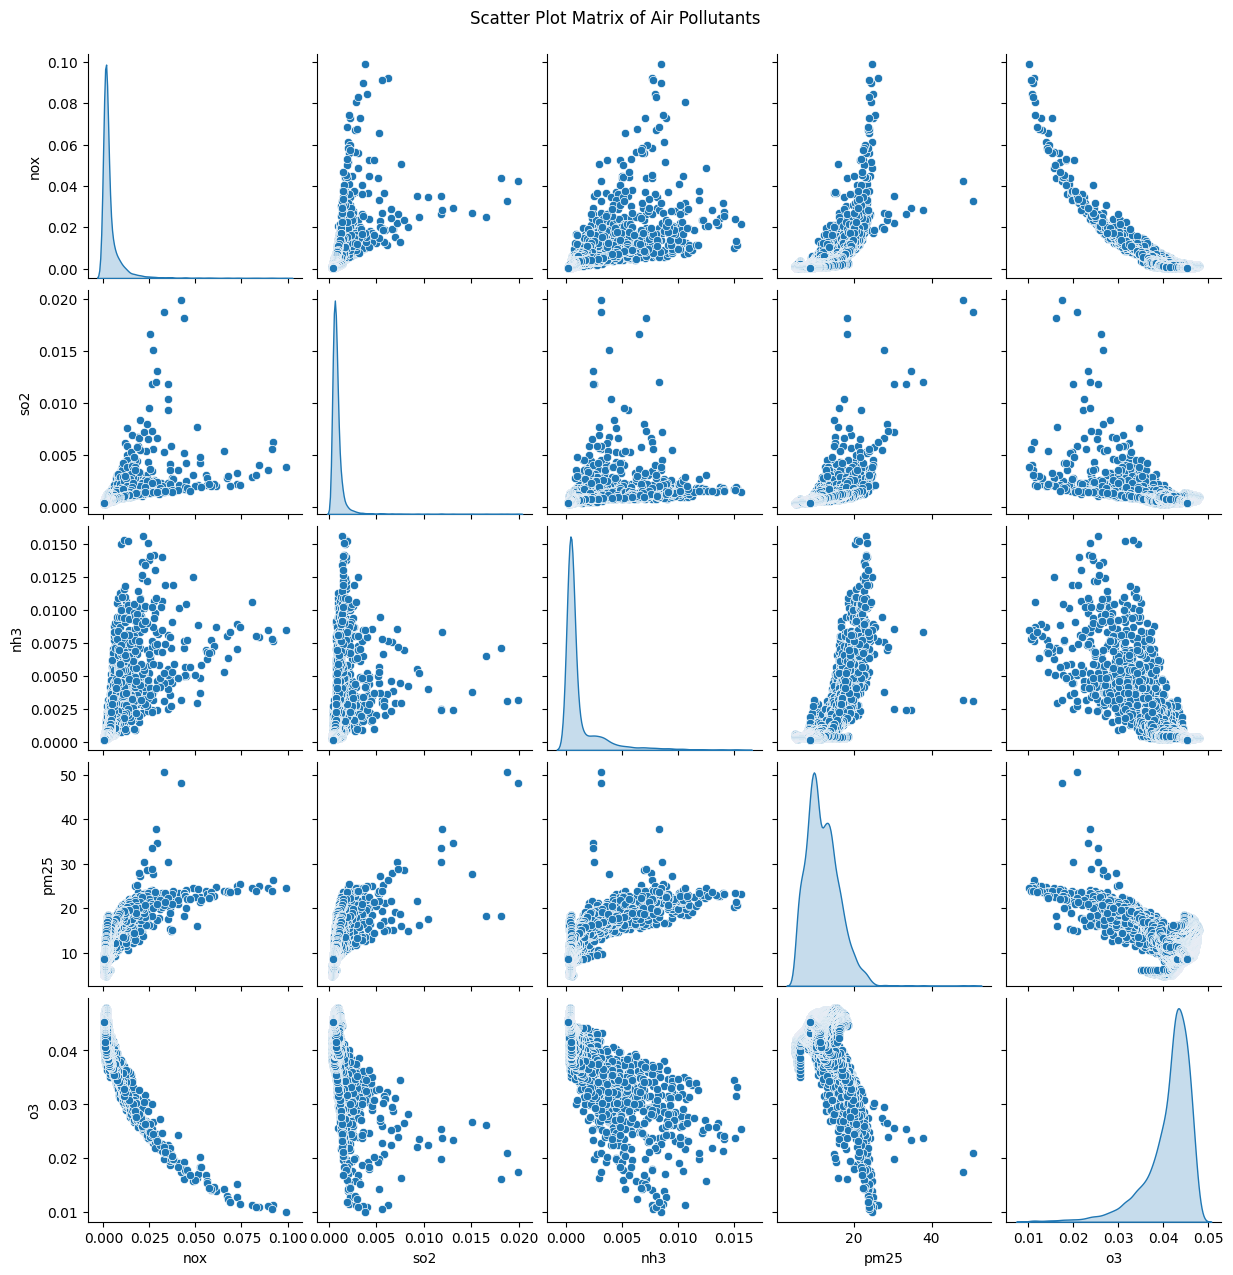

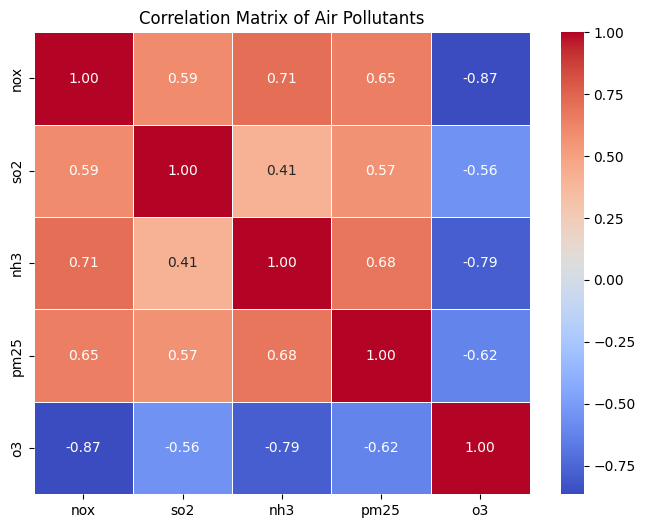

In [43]:
data = {
    'nox': nox.flatten(),
    'so2': so2.flatten(),
    'nh3': nh3.flatten(),
    'pm25': pm25.flatten(),
    'o3': o3.flatten()
}

df = pd.DataFrame(data)

sns.pairplot(df, diag_kind='kde', markers='o')
plt.suptitle('Scatter Plot Matrix of Air Pollutants', y=1.02)
plt.show()

correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Air Pollutants')
plt.show()

In [45]:
# Calculate VIF

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2차원 배열을 1차원으로 변환
df = pd.DataFrame({
    'nox': nox.flatten(),
    'so2': so2.flatten(),
    'nh3': nh3.flatten(),
    'pm25': pm25.flatten(),
    'o3': o3.flatten()
})

# VIF 계산 함수
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# VIF 결과 출력
vif_result = calculate_vif(df)
print(vif_result)
'''
VIF 값의 해석 기준:
    VIF = 1: 다중공선성이 없음.
    VIF < 5: 허용 가능한 수준.
    VIF > 10: 심각한 다중공선성 문제 → 제거 또는 차원 축소 고려.
'''

  Feature        VIF
0     nox   3.765593
1     so2   3.543314
2     nh3   3.825642
3    pm25  22.124529
4      o3  12.030079


In [49]:
import pandas as pd
import geopandas as gpd
from libpysal.weights import KNN
from esda.moran import Moran
import numpy as np

# 모델의 시뮬레이션 결과 예제 (위도, 경도, 오염 농도)
df = pd.DataFrame({
    'latitude': np.linspace(35, 37, 100),  # 가상의 위도 데이터
    'longitude': np.linspace(127, 129, 100),  # 가상의 경도 데이터
    'pm25': np.random.rand(100) * 50  # PM2.5 예측값
})

# GeoDataFrame으로 변환
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# K-최근접 이웃(KNN) 공간 가중치 행렬 생성 (k=5)
w = KNN.from_dataframe(gdf, k=5)

# Moran's I 지수 계산
moran = Moran(gdf['pm25'], w)

print(f"Moran's I: {moran.I}, p-value: {moran.p_norm}")

if moran.I > 0 and moran.p_norm < 0.05:
    print("공간적 자기상관이 유의미함 (공간 클러스터링 존재)")
elif moran.I < 0:
    print("공간적 무작위 분포 및 공간적으로 반대 방향 경향 (고농도와 저농도가 인접)")
else:
    print('공간적 무작위 분포')


Moran's I: -0.025208761715437376, p-value: 0.8032059726019429
공간적 무작위 분포 및 공간적으로 반대 방향 경향 (고농도와 저농도가 인접)


In [51]:
import folium
import geopandas as gpd

# GeoDataFrame으로 변환
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# 지도 시각화
m = folium.Map(location=[36.0, 128.0], zoom_start=8)

# 오염 농도를 색상으로 시각화
for _, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='red' if row['pm25'] > 30 else 'green',
        fill=True
    ).add_to(m)

m.save('pollution_map.html')
print("지도 파일 생성 완료: pollution_map.html")


지도 파일 생성 완료: pollution_map.html


Data shapes:
NOX: (82, 67) SO2: (82, 67) NH3: (82, 67) PM2.5: (82, 67) O3: (82, 67)


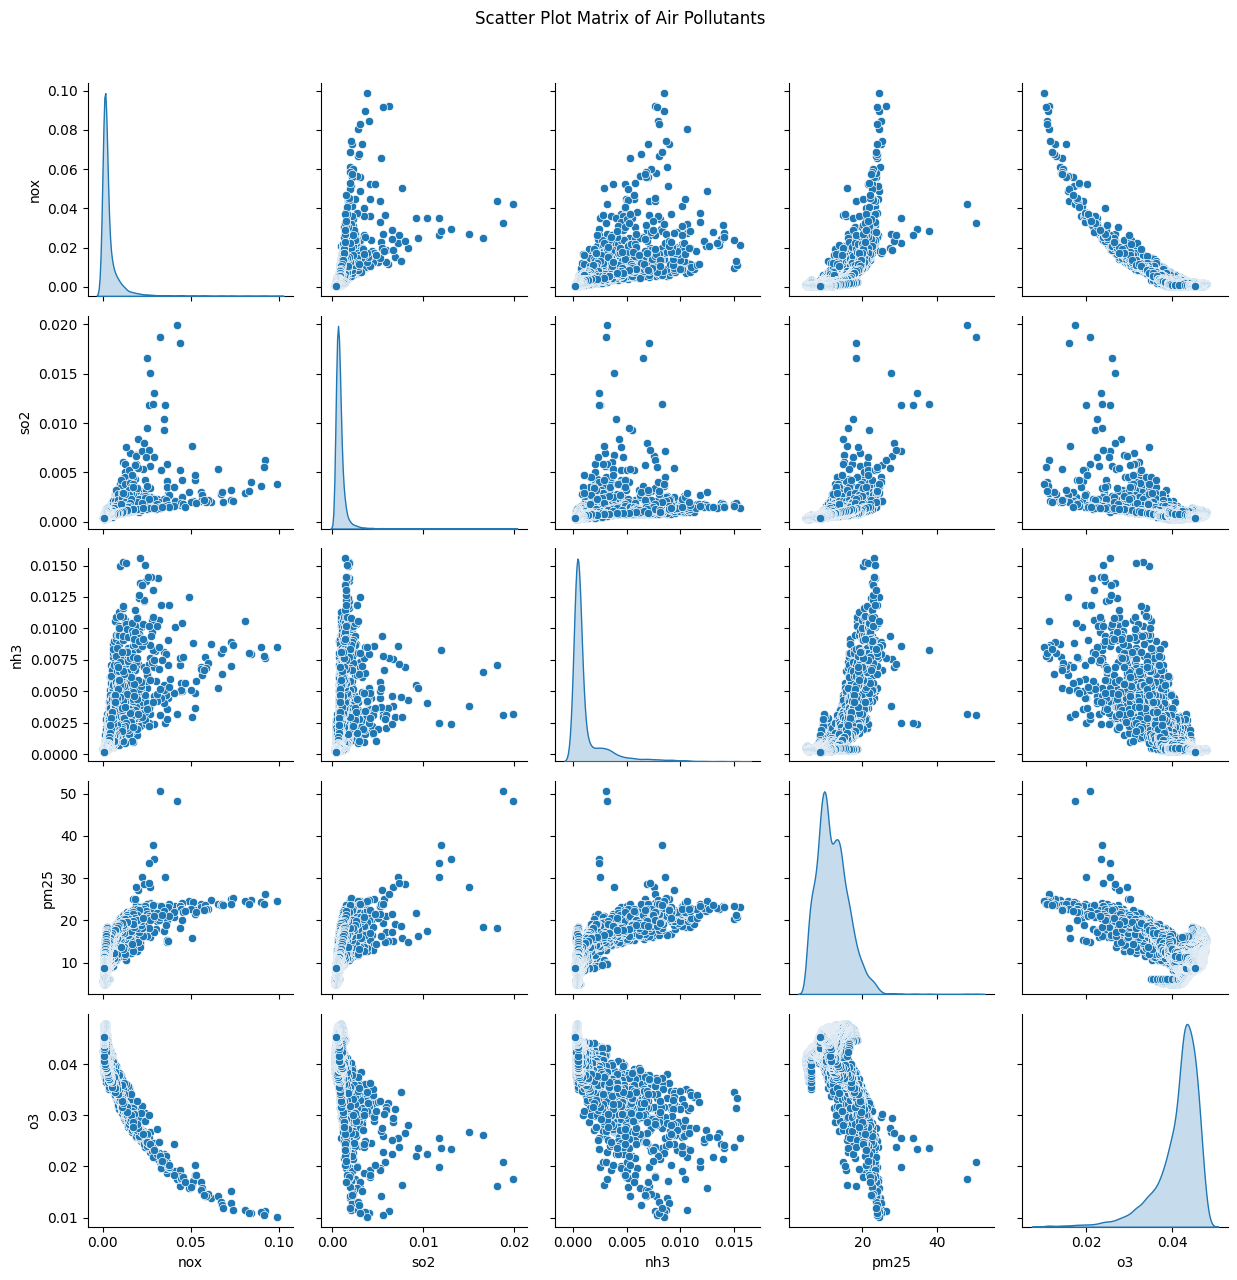

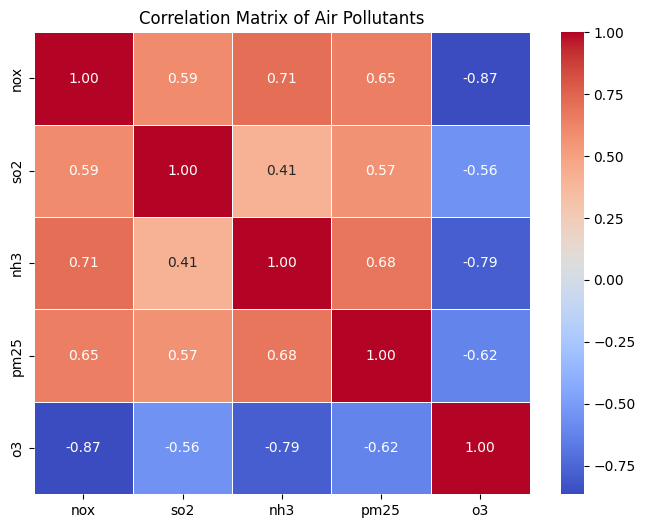


--- Moran's I Spatial Autocorrelation Analysis ---
nox -> Moran's I: 0.9270, p-value: 0.0000
so2 -> Moran's I: 0.7686, p-value: 0.0000
nh3 -> Moran's I: 0.9626, p-value: 0.0000
pm25 -> Moran's I: 0.9731, p-value: 0.0000
o3 -> Moran's I: 0.9669, p-value: 0.0000


In [52]:
import os
import numpy as np
import pandas as pd
import netCDF4 as nc
from netCDF4 import Dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Moran's I 분석을 위한 라이브러리
# !pip install libpysal esda  # (필요시 설치)
from libpysal.weights import lat2W
from esda.moran import Moran

# -----------------------------------------------------------------------
# 1. netCDF 파일 로드 및 변수 추출
# -----------------------------------------------------------------------
base_path_2019 = '/home/user/workdir/main/datasets/concentration/2019/1.00/ACONC.1'

with nc.Dataset(base_path_2019, 'r') as f:
    nox = f.variables['NOX'][:].squeeze()     # (82, 67) 예상
    so2 = f.variables['SO2'][:].squeeze()     # (82, 67) 예상
    nh3 = f.variables['NH3'][:].squeeze()     # (82, 67) 예상
    pm25 = f.variables['PM2_5'][:].squeeze()  # (82, 67) 예상
    o3 = f.variables['O3'][:].squeeze()       # (82, 67) 예상

# 데이터 형태 확인 (디버깅용)
print("Data shapes:")
print("NOX:", nox.shape, "SO2:", so2.shape, "NH3:", nh3.shape, 
      "PM2.5:", pm25.shape, "O3:", o3.shape)

# -----------------------------------------------------------------------
# 2. 1차원으로 변환 후 Pairplot, 상관계수 행렬 시각화
# -----------------------------------------------------------------------
data_dict = {
    'nox': nox.flatten(),
    'so2': so2.flatten(),
    'nh3': nh3.flatten(),
    'pm25': pm25.flatten(),
    'o3': o3.flatten()
}

df = pd.DataFrame(data_dict)

# (2-1) 산점도 행렬
sns.pairplot(df, diag_kind='kde', markers='o')
plt.suptitle('Scatter Plot Matrix of Air Pollutants', y=1.02)
plt.tight_layout()
plt.show()

# (2-2) 상관계수 행렬 (Heatmap)
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Air Pollutants')
plt.show()

# -----------------------------------------------------------------------
# 3. 공간적 자기상관 분석(Moran's I)
# -----------------------------------------------------------------------
# libpysal의 lat2W를 사용해 (82, 67) 격자의 공간 가중치 행렬을 생성
# 인접(상하좌우) 기반의 2D 격자 가중치
w = lat2W(82, 67)
# 행 표준화 (row-standardization)
w.transform = 'r'

variables = {
    'nox': nox, 
    'so2': so2, 
    'nh3': nh3, 
    'pm25': pm25, 
    'o3': o3
}

print("\n--- Moran's I Spatial Autocorrelation Analysis ---")
for var_name, var_data in variables.items():
    var_data_flat = var_data.flatten()  # (82*67,) 형태
    moran = Moran(var_data_flat, w)
    print(f"{var_name} -> Moran's I: {moran.I:.4f}, p-value: {moran.p_norm:.4f}")



[Global Moran's I for PM2.5] I=0.9731, p-value=0.0000


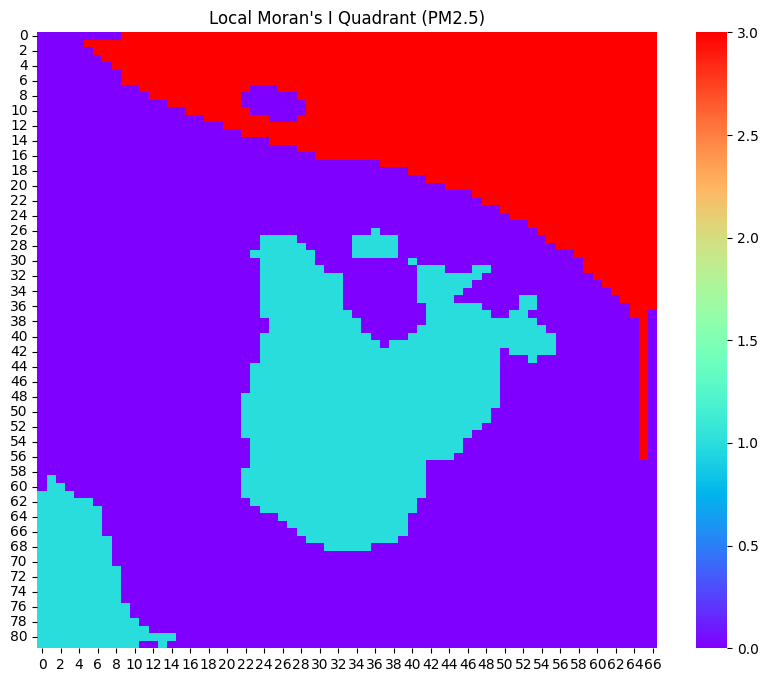

High-High 갯수: 1023, Low-Low 갯수: 1163
Folium map saved: local_moran_pm25.html


In [54]:
import os
import numpy as np
import pandas as pd
import netCDF4 as nc

import matplotlib.pyplot as plt
import seaborn as sns

# 공간 분석 라이브러리
# 설치가 필요하다면: pip install libpysal esda geopandas folium
from libpysal.weights import lat2W
from esda.moran import Moran, Moran_Local

# ----------------------------------------------------------------------------
# 1. netCDF 데이터 로드 (82x67 격자)
# ----------------------------------------------------------------------------
base_path_2019 = '/home/user/workdir/main/datasets/concentration/2019/1.00/ACONC.1'
with nc.Dataset(base_path_2019, 'r') as f:
    nox = f.variables['NOX'][:].squeeze().astype(np.float64)    # shape: (82, 67)
    so2 = f.variables['SO2'][:].squeeze().astype(np.float64)    # shape: (82, 67)
    nh3 = f.variables['NH3'][:].squeeze().astype(np.float64)    # shape: (82, 67)
    pm25 = f.variables['PM2_5'][:].squeeze().astype(np.float64) # shape: (82, 67)
    o3 = f.variables['O3'][:].squeeze().astype(np.float64)      # shape: (82, 67)

# 예시: pm25 데이터만 Local Moran’s I 분석해본다고 가정
data_2d = pm25  # shape (82, 67)
data_flat = data_2d.flatten()

# ----------------------------------------------------------------------------
# 2. 글로벌 Moran’s I (복습)
# ----------------------------------------------------------------------------
w = lat2W(82, 67)  # 82x67 격자 형태의 공간 가중치
w.transform = 'r'  # row-standardization

moran_global = Moran(data_flat, w)
print(f"[Global Moran's I for PM2.5] I={moran_global.I:.4f}, p-value={moran_global.p_norm:.4f}")

# ----------------------------------------------------------------------------
# 3. Local Moran’s I 계산 (LISA)
# ----------------------------------------------------------------------------
moran_local = Moran_Local(data_flat, w)

# 결과 해석에 유용한 속성들
# moran_local.Is : 각 지점(픽셀)의 Local Moran’s I 값
# moran_local.p_sim : 각 지점(픽셀)의 p-value (유의성)
# moran_local.q : 각 지점(픽셀)이 속한 사분면 (1~4)

# 1=HH, 2=LH, 3=LL, 4=HL 형태로 분류
# (Libpysal 문서 상 quadrant legend: 
#  1= High-High, 2= Low-High, 3= Low-Low, 4= High-Low)

# 예시: q_labels를 만들어 각 지점을 문자열로 표시
q_labels = {1: 'High-High', 2: 'Low-High', 3: 'Low-Low', 4: 'High-Low'}

# p < 0.05인 지점만 클러스터로 보고자 한다면:
significance = 0.05

# Local Moran’s I 결과를 2차원 배열로 다시 변환
I_local_2d = moran_local.Is.reshape(82, 67)
p_local_2d = moran_local.p_sim.reshape(82, 67)
q_local_2d = moran_local.q.reshape(82, 67)

# ----------------------------------------------------------------------------
# 4. 시각화: High-High, Low-Low 지도 시각화
# ----------------------------------------------------------------------------
# (A) 간단히 matplotlib으로 분류 시각화
plt.figure(figsize=(10, 8))
# 유의한 지점만 q_local_2d 시각화
# p-value < 0.05가 아닌 곳은 0으로 처리 (값 없음)
q_local_2d_masked = np.where(p_local_2d < significance, q_local_2d, 0)

# q_local_2d_masked는 0,1,2,3,4 (0=유의X, 나머지=사분면)
sns.heatmap(q_local_2d_masked, cmap="rainbow")
plt.title("Local Moran's I Quadrant (PM2.5)")
plt.show()

# (B) High-High 지점만 따로 마스크
hh_mask = (q_local_2d == 1) & (p_local_2d < significance)
ll_mask = (q_local_2d == 3) & (p_local_2d < significance)

print(f"High-High 갯수: {np.sum(hh_mask)}, Low-Low 갯수: {np.sum(ll_mask)}")

# ----------------------------------------------------------------------------
# 5. Folium & GeoPandas를 사용한 지도 시각화
# ----------------------------------------------------------------------------
try:
    import geopandas as gpd
    import folium

    # 만약 netCDF에 위경도 좌표(lat, lon)가 있다면 여기서 가져와서
    # lat_arr = f.variables['LAT'][:]  # shape (82, 67)
    # lon_arr = f.variables['LON'][:]  # shape (82, 67)
    # 등으로 처리해야 함.
    # 여기서는 예시로 (82, 67)을 대충 우리나라 특정 영역에 매핑한다고 가정
    # (범위, spacing도 임의 설정)
    lat_min, lat_max = 33.0, 43.0
    lon_min, lon_max = 125.0, 131.0
    lat_grid = np.linspace(lat_min, lat_max, 82)
    lon_grid = np.linspace(lon_min, lon_max, 67)

    # 각 grid cell 별 중앙값(위도, 경도) 추출
    # 실제론, cell center가 아니라 corner를 반영할 수도 있음.
    lat_centers = 0.5 * (lat_grid[:-1] + lat_grid[1:])
    lon_centers = 0.5 * (lon_grid[:-1] + lon_grid[1:])
    
    # 주의: shape이 (81, 66)이 될 것인데, 
    # 일단 단순화하여 (82,67) 동일 크기로 맞춘다고 가정
    # (실제로는 격자 크기에 맞게 조정해야 함)
    lat_coords = np.repeat(lat_grid[:, np.newaxis], 67, axis=1)  # shape (82, 67)
    lon_coords = np.repeat(lon_grid[np.newaxis, :], 82, axis=0)  # shape (82, 67)

    # GeoDataFrame 생성
    # (point geometry 또는 polygon geometry를 만들어도 됨)
    coords_flat = np.column_stack((lon_coords.flatten(), lat_coords.flatten()))

    gdf = gpd.GeoDataFrame({
        'pm25': data_flat,
        'I_local': moran_local.Is,
        'p_val': moran_local.p_sim,
        'quad': moran_local.q
    },
    geometry=gpd.points_from_xy(coords_flat[:, 0], coords_flat[:, 1]),
    crs="EPSG:4326")  # WGS84로 가정

    # 지도 중심(대충)과 줌레벨 설정
    map_center = [37.0, 127.0]
    m = folium.Map(location=map_center, zoom_start=6)

    # folium에 점(마커)으로 시각화
    # ex) p < 0.05 AND quad==1(High-High)인 지점 빨간색
    for idx, row in gdf.iterrows():
        # 유의한 지점만 표시
        if row['p_val'] < significance:
            quad_label = q_labels[row['quad']] if row['quad'] in q_labels else 'Not Sig'
            color = 'red' if row['quad'] == 1 else \
                    'blue' if row['quad'] == 3 else \
                    'green'
            
            folium.CircleMarker(
                location=[row.geometry.y, row.geometry.x],
                radius=3,
                fill=True,
                color=color,
                fill_opacity=0.6,
                popup=folium.Popup(f"PM2.5={row['pm25']:.1f}, {quad_label}")
            ).add_to(m)

    # 결과 지도 저장
    map_name = "local_moran_pm25.html"
    m.save(map_name)
    print(f"Folium map saved: {map_name}")

except ImportError:
    print("geopandas or folium not installed (skip folium mapping)")


# Precursor Input Data Analysis

In [9]:
import os

import numpy as np
import pandas as pd
import netCDF4 as nc
from netCDF4 import Dataset

import matplotlib.pyplot as plt
import seaborn as sns

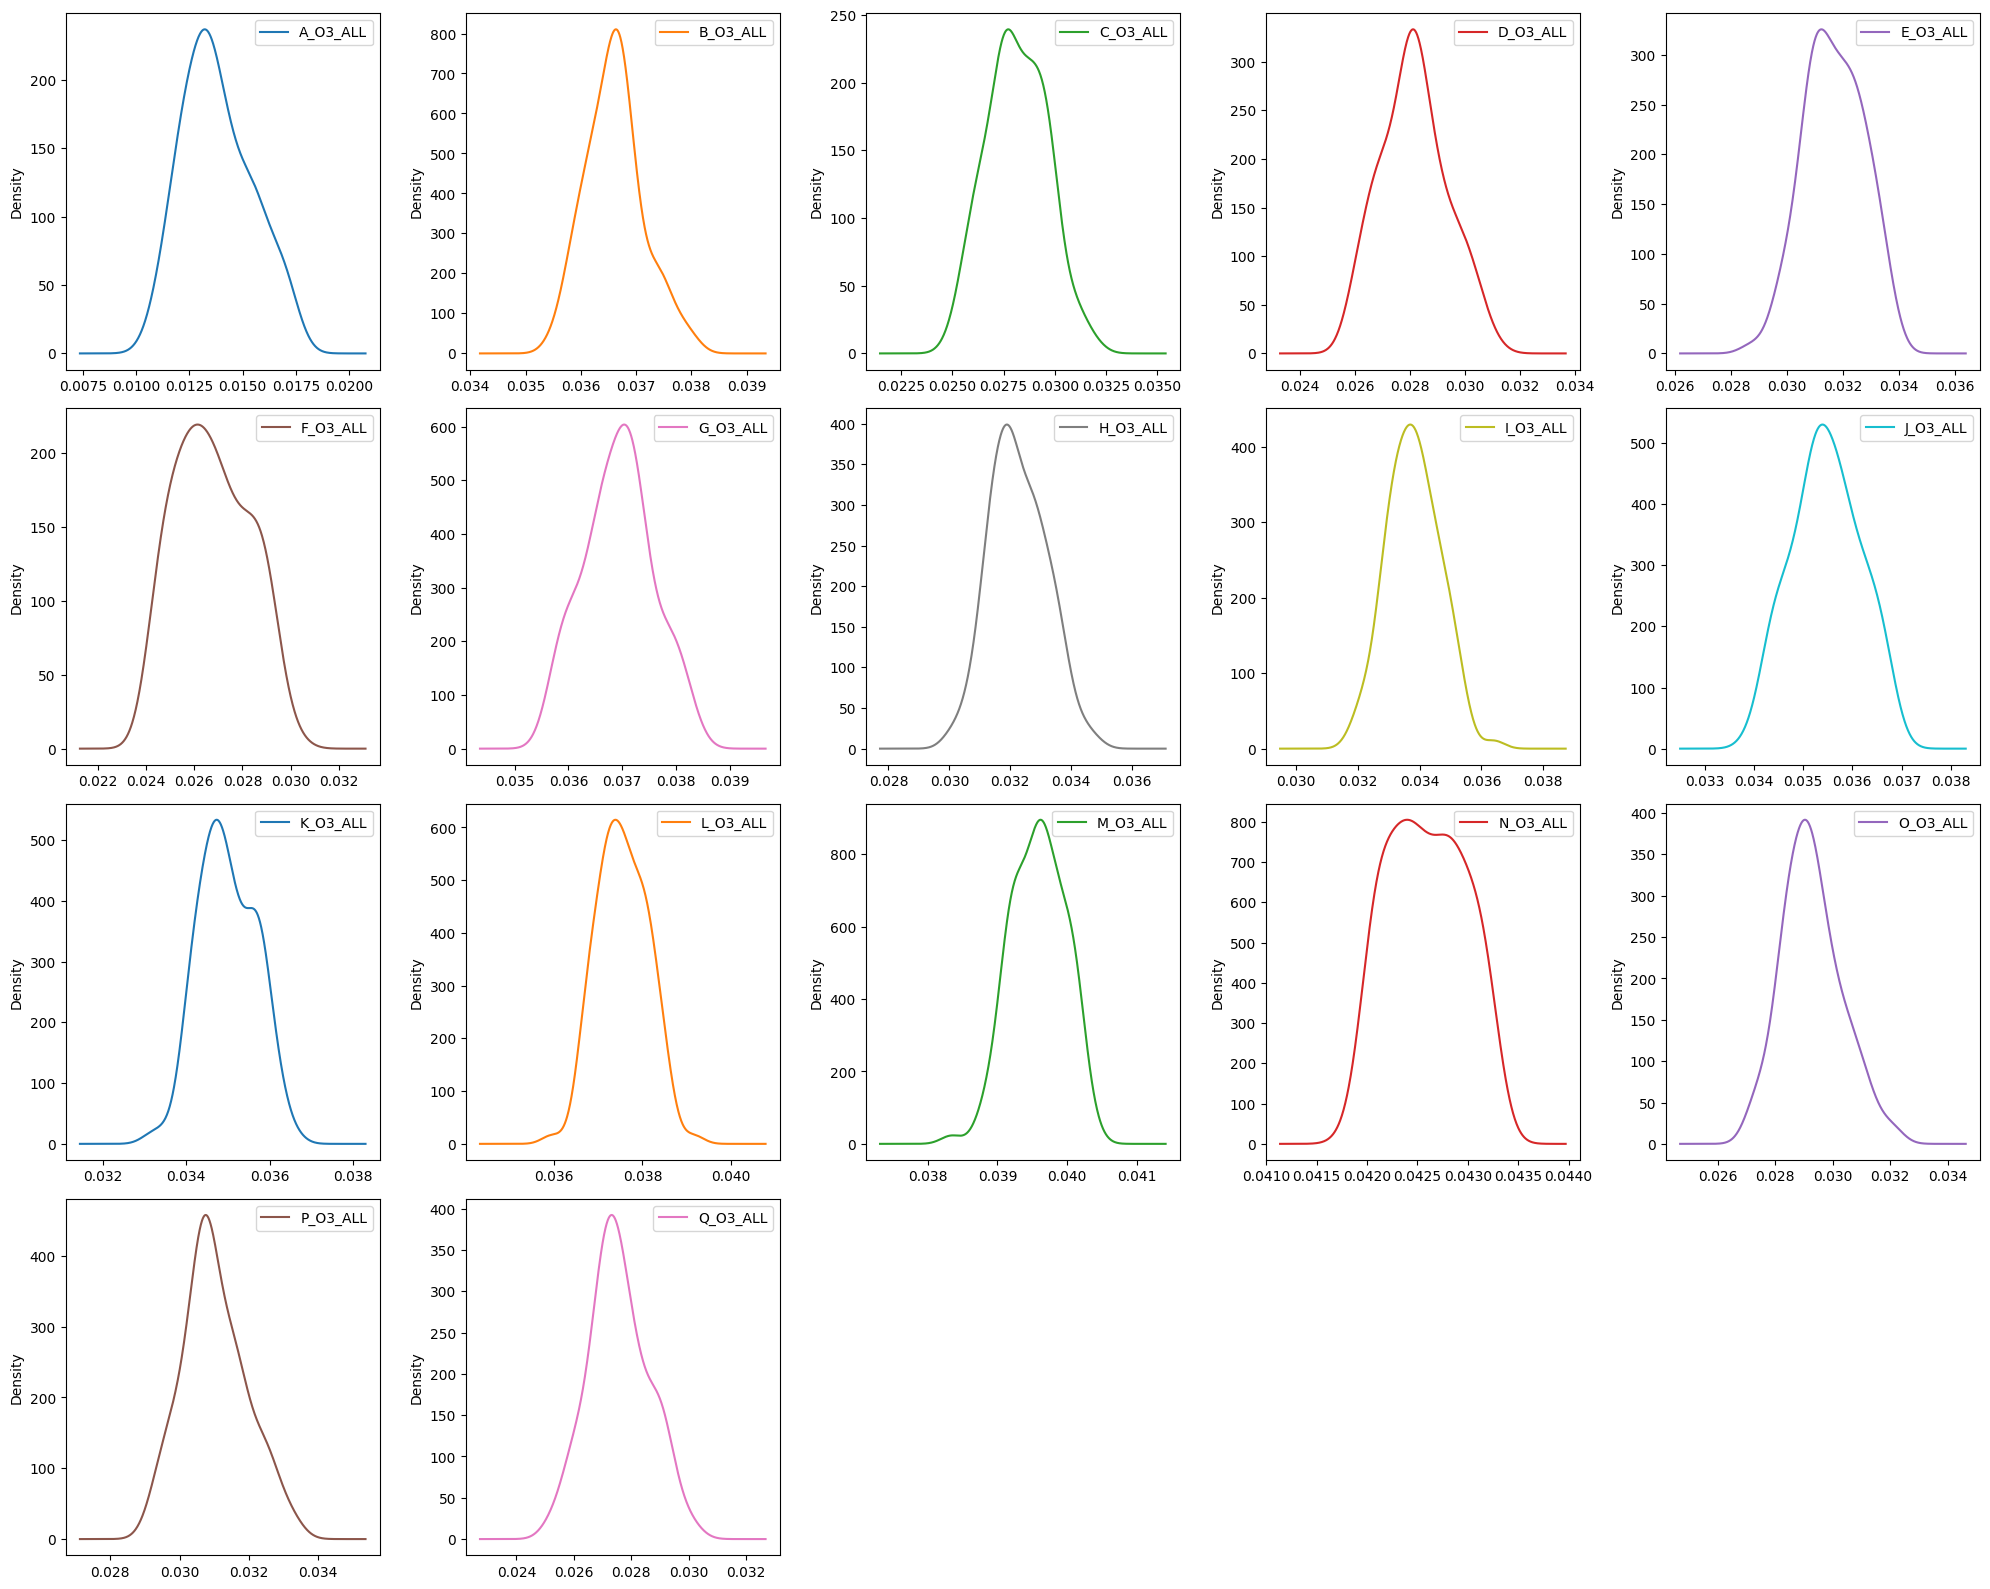

In [12]:
df = pd.read_csv('/home/user/workdir/o3_1.0_mean_renamed.csv')  # 2차원 데이터
df.plot(kind='kde', subplots=True, layout=(4, 5), figsize=(20, 16), sharex=False)
plt.tight_layout()
plt.show()

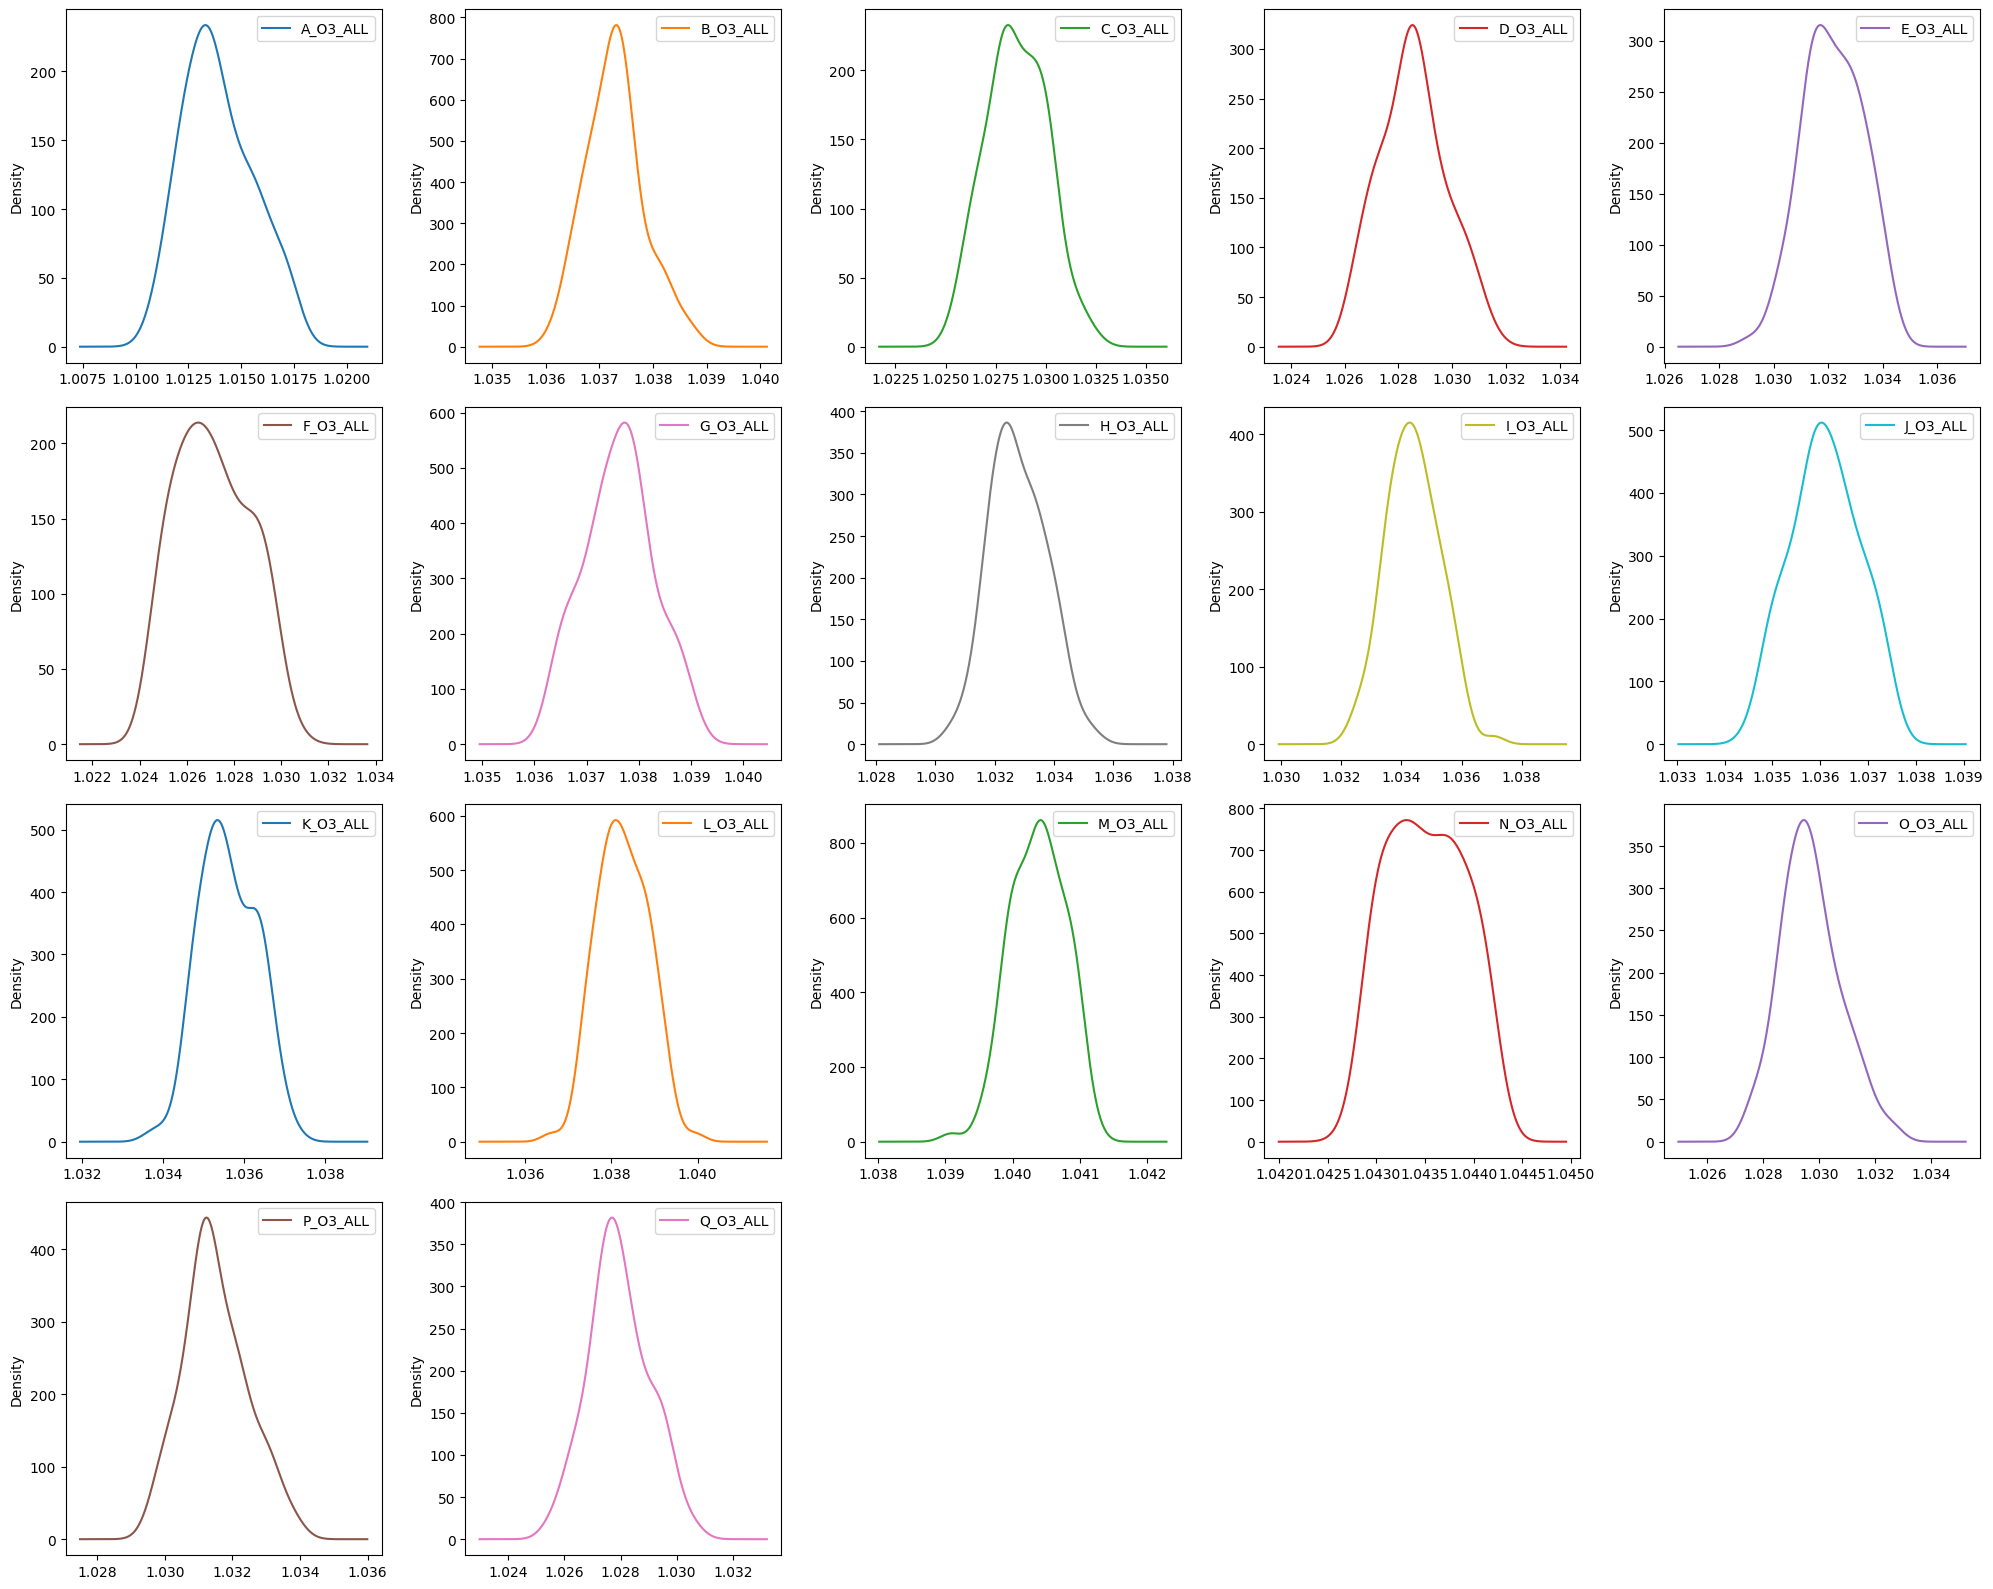

In [19]:
num_cols = df.select_dtypes(include=[np.number]).columns
df_log = df.copy()
df_log[num_cols] = df[num_cols].apply(lambda x: np.log(x))
df_log.plot(kind='kde', subplots=True, layout=(4, 5), figsize=(20, 16), sharex=False)
plt.tight_layout()
plt.show()

In [23]:
# df는 이미 존재한다고 가정
df_skewness = df.skew()  # 각 열별 skewness 계산
df_log_skewness = df_log.skew()
print("skewness of df")
print(df_skewness)
print("skewness of log(df)")
print(df_log_skewness)

A_O3_ALL    0.374097
B_O3_ALL    0.383623
C_O3_ALL    0.093790
D_O3_ALL    0.203746
E_O3_ALL   -0.096998
F_O3_ALL    0.180541
G_O3_ALL    0.045506
H_O3_ALL    0.208498
I_O3_ALL    0.170442
J_O3_ALL   -0.005398
K_O3_ALL    0.041333
L_O3_ALL    0.071293
M_O3_ALL   -0.246938
N_O3_ALL    0.054121
O_O3_ALL    0.435286
P_O3_ALL    0.338523
Q_O3_ALL    0.173284
dtype: float64

A_O3_ALL    0.377066
B_O3_ALL    0.385123
C_O3_ALL    0.097076
D_O3_ALL    0.206333
E_O3_ALL   -0.094630
F_O3_ALL    0.182725
G_O3_ALL    0.046890
H_O3_ALL    0.210773
I_O3_ALL    0.172810
J_O3_ALL   -0.004093
K_O3_ALL    0.042799
L_O3_ALL    0.072766
M_O3_ALL   -0.245948
N_O3_ALL    0.054617
O_O3_ALL    0.438114
P_O3_ALL    0.340721
Q_O3_ALL    0.175868
dtype: float64


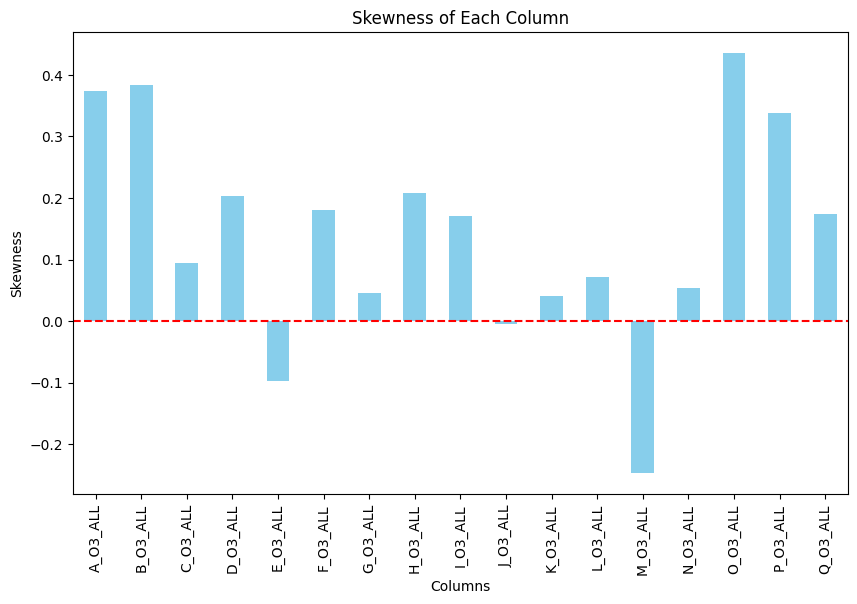

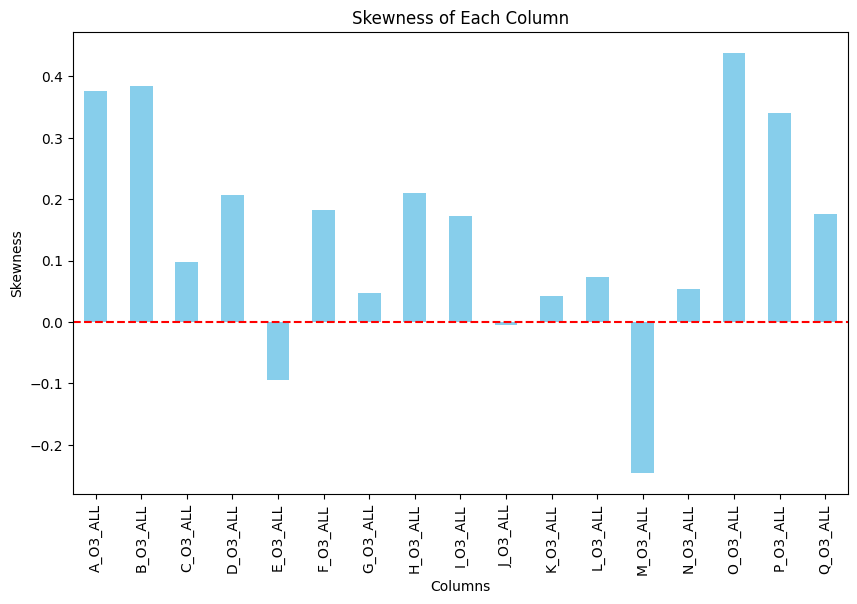

In [24]:
plt.figure(figsize=(10, 6))
df_skewness.plot(kind='bar', color='skyblue')  # 막대 그래프
plt.axhline(y=0, color='red', linestyle='--')  # 스큐니스 0 기준선
plt.title("Skewness of Each Column")
plt.xlabel("Columns")
plt.ylabel("Skewness")
plt.show()

plt.figure(figsize=(10, 6))
df_log_skewness.plot(kind='bar', color='skyblue')  # 막대 그래프
plt.axhline(y=0, color='red', linestyle='--')  # 스큐니스 0 기준선
plt.title("Skewness of Each Column")
plt.xlabel("Columns")
plt.ylabel("Skewness")
plt.show()

# O3 데이터 정규화 과정

In [65]:
df = pd.read_csv('/home/user/workdir/o3_1.0_mean_renamed.csv')  # 2차원 데이터
# print(df.describe())

df.reset_index(drop=True).values
df_array = np.array(df).reshape(-1)
df_array.shape

(2023,)

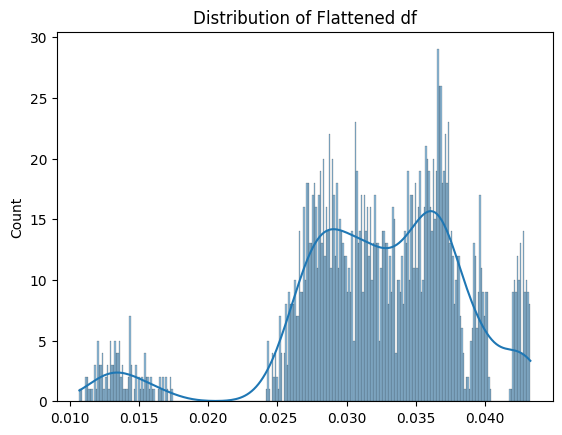

In [66]:
sns.histplot(df_array, kde=True, bins=300)
plt.title("Distribution of Flattened df")
plt.show()

In [67]:
from scipy.stats import skew

skew_value = skew(df_array, bias=True)  # 또는 bias=False
print(f"Flattened Distribution Skewness = {skew_value:.4f}")

Flattened Distribution Skewness = -1.0556


In [162]:
print(f'mean= {df_array.mean():.3f}')
print(f'min= {df_array.min():.3f}')
print(f'max= {df_array.max():.3f}')

mean= 0.032
min= 0.011
max= 0.043


In [69]:
def triangular_ppf(p, a=0.5, c=1.0, b=1.5):
    p = np.asarray(p)
    F_c = (c - a) / (b - a)  # 분포 내 분할 지점, 50% 미만일 때 CDF
    # Normalized 리스트 초기화
    x = np.full_like(p, fill_value=np.nan, dtype=np.float64)

    # 구간 1: 0 <= p < F_c
    idx1 = (p < F_c) # 최빈값(c) 이전 구간
    x[idx1] = a + np.sqrt(p[idx1] * (b - a) * (c - a)) # 조건에 따른 PPF 계산 식 (CDF의 역)
    
    # 구간 2: F_c <= p <= 1
    idx2 = ~idx1     # 최빈값(c) 이후 구간
    x[idx2] = b - np.sqrt((1 - p[idx2]) * (b - a) * (b - c)) # 조건에 따른 PPF 계산 식 (CDF의 역)
    
    return x

def triangular_transform(data, a=0.5, c=1.0, b=1.5):
    """
    주어진 O3 data를 Triangular(a, c, b) 분포로 매핑(정규화).
    """
    data = np.asarray(data, dtype=float)
    n = len(data)
    if n == 0: # 빈 배열이면 그대로 반환
        return data  
    
    # 1) 랭크 -> Empirical CDF [0, 1] 확률
    ranks = data.argsort().argsort() # 오름차순 정렬했을 시 원본 데이터의 값들이 몇 번째 인덱스에 있는 지 표현
    p = (ranks + 0.5) / n  # 데이터의 rank를 고려하여, 0 ~ 1 범위 내 확률 값 계산
    
    # 2) Triangular Inverse CDF로 매핑
    transformed = triangular_ppf(p, a, c, b)
    return transformed

[원본] min=0.011, max=0.043, mean=0.032
[변환] min=0.511, max=1.489, mean=1.000


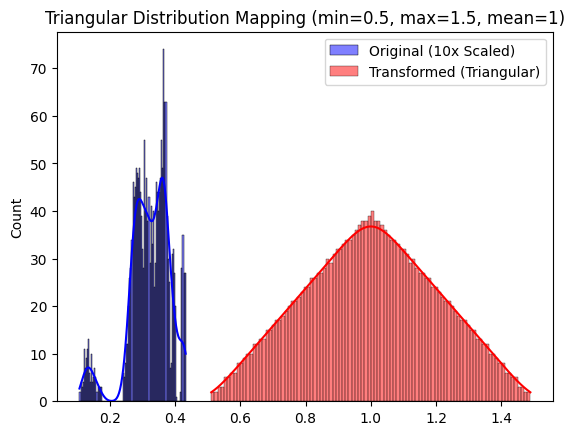

In [100]:
# Triangular(0.5, 1.0, 1.5)로 매핑
transformed_data = triangular_transform(df_array, a=0.5, c=1.0, b=1.5)

print(f"[원본] min={df_array.min():.3f}, max={df_array.max():.3f}, mean={df_array.mean():.3f}")
print(f"[변환] min={transformed_data.min():.3f}, max={transformed_data.max():.3f}, mean={transformed_data.mean():.3f}")

# 히스토그램 시각화
sns.histplot(df_array*10, kde=True, color='blue', alpha=0.5, bins=100, label='Original (10x Scaled)')
sns.histplot(transformed_data, kde=True, color='red', alpha=0.5, bins=100, label='Transformed (Triangular)')
plt.title("Triangular Distribution Mapping (min=0.5, max=1.5, mean=1)")
plt.legend()
plt.show()

In [71]:
df_norm = pd.DataFrame(
    transformed_data.reshape(df.shape),  # (행,열) 복원
    index=df.index,                     # 원본 행 인덱스 유지
    columns=df.columns                  # 원본 열 이름/순서 유지
)

print("df_norm shape:", df_norm.shape)
print(df_norm.head())

# -------------------------------
# 6. CSV로 저장
# -------------------------------
save_path = '/home/user/workdir/main/normal_o3.csv'
df_norm.to_csv(save_path, index=False)
print(f"\nNormalized data saved to: {save_path}")

df_norm shape: (119, 17)
   A_O3_ALL  B_O3_ALL  C_O3_ALL  D_O3_ALL  E_O3_ALL  F_O3_ALL  G_O3_ALL  \
0  0.623289  1.143055  0.813835  0.821998  0.967294  0.733977  1.175327   
1  0.585388  1.139267  0.805454  0.831826  1.011249  0.692224  1.165577   
2  0.643658  1.125814  0.775234  0.743806  0.921699  0.749815  1.168174   
3  0.608351  1.142363  0.852766  0.843537  0.928674  0.736081  1.158266   
4  0.664511  1.172673  0.790099  0.746327  0.943133  0.854862  1.195762   

   H_O3_ALL  I_O3_ALL  J_O3_ALL  K_O3_ALL  L_O3_ALL  M_O3_ALL  N_O3_ALL  \
0  0.987232  1.027446  1.086887  1.066738  1.215928  1.287037  1.382879   
1  0.997025  1.060226  1.076546  1.065030  1.252671  1.302700  1.343181   
2  0.994283  1.018124  1.049126  1.039633  1.215493  1.260283  1.395126   
3  0.954967  1.003223  1.059945  1.060507  1.153954  1.268145  1.328862   
4  0.988751  1.029806  1.059665  1.035890  1.221641  1.263397  1.456946   

   O_O3_ALL  P_O3_ALL  Q_O3_ALL  
0  0.878781  0.946744  0.784941  
1  0.

In [72]:
# 1) 원본 df -> Flatten
df_array = df.to_numpy().reshape(-1)

# 2) Triangular 정규화 (혹은 다른 비선형 변환)
transformed_array = triangular_transform(df_array)

# 3) (행, 열) 복원
df_norm = pd.DataFrame(
    transformed_array.reshape(df.shape),  # 같은 (행,열)
    index=df.index,                       # 원본 행 인덱스
    columns=df.columns                    # 원본 열 이름/순서
)

In [77]:
print(df.to_numpy())
print(df_norm.to_numpy())

[[0.01357265 0.03654354 0.02788347 ... 0.02912483 0.0309615  0.0274194 ]
 [0.01255924 0.0365045  0.02775098 ... 0.02925149 0.0320919  0.02882561]
 [0.01447769 0.03624592 0.02726708 ... 0.02840412 0.02928017 0.02699475]
 ...
 [0.01355368 0.03670789 0.02928807 ... 0.02923633 0.02949586 0.02593837]
 [0.01671679 0.03749275 0.02744438 ... 0.02995862 0.03163093 0.0273688 ]
 [0.01646583 0.03689113 0.02572985 ... 0.02990116 0.03060363 0.02749596]]
[[0.62328908 1.14305492 0.81383489 ... 0.87878099 0.94674359 0.78494087]
 [0.58538824 1.13926669 0.8054538  ... 0.88396557 0.98519862 0.86346359]
 [0.64365816 1.12581445 0.77523414 ... 0.84245631 0.88428729 0.75856557]
 ...
 [0.62126781 1.15718302 0.88557146 ... 0.88364359 0.89413019 0.71004201]
 [0.66674903 1.21462576 0.78623901 ... 0.91101372 0.96914168 0.78276406]
 [0.66375778 1.1715425  0.70102309 ... 0.90920573 0.93040061 0.7883896 ]]


# O3 데이터 정규화 분석

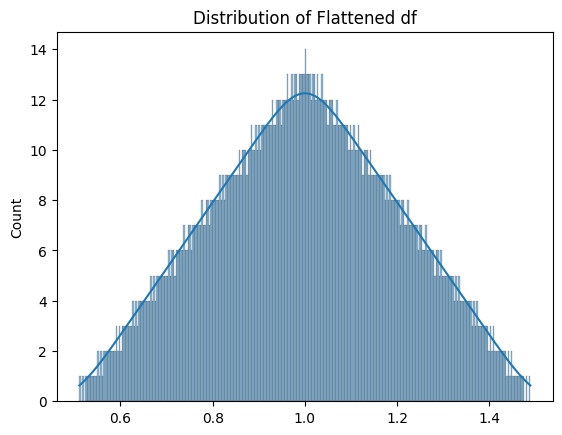

In [164]:
df = pd.read_csv('/home/user/workdir/o3_1.0_mean_renamed.csv')  # 2차원 데이터
# print(df.describe())

df.reset_index(drop=True).values
df_array = np.array(df).reshape(-1)

df_test = pd.read_csv('/home/user/workdir/main/normal_o3.csv')  # 2차원 데이터
# print(df.describe())

df_test.reset_index(drop=True).values
df_array_test = np.array(df_test).reshape(-1)

sns.histplot(df_array_test, kde=True, bins=300)
plt.title("Distribution of Flattened df")
plt.show()

In [168]:
def calculate_deviation_ratios(data):
    """리스트 내 편차 비율을 계산하는 함수"""
    mean_value = np.mean(data)
    deviation_ratios = (data - mean_value) / mean_value
    return deviation_ratios

original_ratios = calculate_deviation_ratios(df)
normalized_ratios = calculate_deviation_ratios(df_test)

print("Original Deviation Ratios:", original_ratios.mean())
print("Normalized Deviation Ratios:", normalized_ratios.mean())

Original Deviation Ratios: A_O3_ALL   -0.569724
B_O3_ALL    0.139456
C_O3_ALL   -0.123714
D_O3_ALL   -0.123690
E_O3_ALL   -0.014328
F_O3_ALL   -0.167441
G_O3_ALL    0.149390
H_O3_ALL    0.004166
I_O3_ALL    0.052154
J_O3_ALL    0.103884
K_O3_ALL    0.088953
L_O3_ALL    0.168724
M_O3_ALL    0.231940
N_O3_ALL    0.325645
O_O3_ALL   -0.088903
P_O3_ALL   -0.034677
Q_O3_ALL   -0.141834
dtype: float64
Normalized Deviation Ratios: A_O3_ALL   -0.385660
B_O3_ALL    0.151756
C_O3_ALL   -0.177087
D_O3_ALL   -0.176704
E_O3_ALL   -0.032080
F_O3_ALL   -0.241947
G_O3_ALL    0.173353
H_O3_ALL   -0.012813
I_O3_ALL    0.031897
J_O3_ALL    0.090802
K_O3_ALL    0.070516
L_O3_ALL    0.212224
M_O3_ALL    0.290822
N_O3_ALL    0.385660
O_O3_ALL   -0.120975
P_O3_ALL   -0.053429
Q_O3_ALL   -0.206334
dtype: float64


In [137]:
df_test.describe()

,A_O3_ALL,B_O3_ALL,C_O3_ALL,D_O3_ALL,E_O3_ALL,F_O3_ALL,G_O3_ALL,H_O3_ALL,I_O3_ALL,J_O3_ALL,K_O3_ALL,L_O3_ALL,M_O3_ALL,N_O3_ALL,O_O3_ALL,P_O3_ALL,Q_O3_ALL
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,0.614340,1.151756,0.822913,0.823296,0.967920,0.758053,1.173353,0.987187,1.031897,1.090802,1.070516,1.212224,1.290822,1.385660,0.879025,0.946571,0.793666
std,0.040571,0.034710,0.072203,0.060848,0.034441,0.070211,0.041699,0.027596,0.025836,0.030835,0.026425,0.032048,0.020688,0.040571,0.044704,0.030960,0.055213
min,0.511117,1.087486,0.683676,0.706482,0.856945,0.671858,1.095350,0.915202,0.974901,1.033500,1.013276,1.110919,1.252172,1.328862,0.768415,0.880733,0.688327
25%,0.586106,1.126310,0.772749,0.773195,0.944386,0.695095,1.139439,0.968218,1.014674,1.070893,1.050636,1.189331,1.273265,1.351687,0.846938,0.924619,0.755440
50%,0.621268,1.147935,0.819687,0.826571,0.969931,0.737646,1.177235,0.986978,1.028494,1.087186,1.067023,1.217236,1.289958,1.378732,0.881058,0.942575,0.788390
75%,0.648313,1.171354,0.887326,0.869030,0.995406,0.817553,1.202956,1.006219,1.045577,1.112032,1.090643,1.238346,1.308098,1.413894,0.909357,0.968087,0.831640
max,0.671138,1.241434,0.978789,0.950600,1.030595,0.916984,1.251674,1.060789,1.134502,1.170416,1.147234,1.267612,1.328142,1.488883,0.986470,1.017355,0.917872


In [ ]:
num_cols = df_test.select_dtypes(include=[np.number]).columns
df_test.plot(kind='kde', subplots=True, layout=(4, 5), figsize=(20, 16), sharex=False)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import entropy

def kl_divergence(original, normalized, col_name):
    p = np.histogram(original[col_name], bins=50, density=True)[0]
    q = np.histogram(normalized[col_name], bins=50, density=True)[0]
    return entropy(p, q)

def plot_correlation_matrices(original, normalized):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    sns.heatmap(original.corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=axes[0])
    axes[0].set_title('Original Correlation')

    sns.heatmap(normalized.corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1])
    axes[1].set_title('Normalized Correlation')
    
    plt.show()

# kl_div = kl_divergence(df, df_test, 'Q_O3_ALL')
# print(f'KL Divergence for Column1: {kl_div:.4f}')

plot_correlation_matrices(df, df_test)

# fig, axes1 = plt.subplots(1, 2, figsize=(16, 8))
# sns.pairplot(df, diag_kind='kde', markers='o')
# axes1[0].set_title('Scatter Plot Matrix of Original', y=1.02)

# sns.pairplot(df_test, diag_kind='kde', markers='o')
# axes1[1].set_title('Scatter Plot Matrix of Normalized', y=1.02)
# plt.show()

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

def qq_plot_comparison_sliced(original_df, normalized_df, columns, slice_size=5):
    num_cols = len(columns)
    num_slices = (num_cols + slice_size - 1) // slice_size  # 전체 컬럼을 슬라이싱 크기로 나누기

    for slice_idx in range(num_slices):
        start_idx = slice_idx * slice_size
        end_idx = min((slice_idx + 1) * slice_size, num_cols)

        # 현재 슬라이스에 해당하는 컬럼 목록
        sliced_columns = columns[start_idx:end_idx]
        
        fig, axes = plt.subplots(nrows=len(sliced_columns), ncols=2, figsize=(12, 4 * len(sliced_columns)))
        
        for idx, col in enumerate(sliced_columns):
            # 원본 데이터 QQ-Plot (왼쪽)
            stats.probplot(original_df[col], dist="norm", plot=axes[idx][0])
            axes[idx][0].set_title(f'QQ Plot of {col} Before Normalization')
            axes[idx][0].set_xlabel('Theoretical Quantiles')
            axes[idx][0].set_ylabel('Sample Quantiles')

            # 정규화된 데이터 QQ-Plot (오른쪽)
            stats.probplot(normalized_df[col], dist="norm", plot=axes[idx][1])
            axes[idx][1].set_title(f'QQ Plot of {col} After Normalization')
            axes[idx][1].set_xlabel('Theoretical Quantiles')
            axes[idx][1].set_ylabel('Sample Quantiles')

        plt.tight_layout()
        plt.show()

# 컬럼 목록 (A_O3_ALL ~ Q_O3_ALL)
columns = [f'{chr(i)}_O3_ALL' for i in range(ord('A'), ord('Q') + 1)]

# QQ-Plot 실행 (5개씩 슬라이싱하여 표시)
qq_plot_comparison_sliced(df, df_test, columns, slice_size=5)


In [144]:
input_6 = pd.read_csv('/home/user/workdir/main/resources/ctrl/precursor_control_2019_with_o3.csv')  # 2차원 데이터
input_5 = pd.read_csv('/home/user/workdir/main/resources/ctrl/precursor_control_2019_4input_o3.csv')  # 2차원 데이터
input_4 = pd.read_csv('/home/user/workdir/main/resources/ctrl/precursor_control_2019_3input_o3.csv')  # 2차원 데이터

In [152]:
o3 = pd.read_csv('/home/user/workdir/o3_1.0_mean_renamed.csv')
o3_normalized = pd.read_csv('/home/user/workdir/main/normal_o3.csv')

In [16]:
def triangular_ppf(p, a=0.5, c=1.0, b=1.5):
    p = np.asarray(p)
    F_c = (c - a) / (b - a)  # 분포 내 분할 지점, 50% 미만일 때 CDF
    # Normalized 리스트 초기화
    x = np.full_like(p, fill_value=np.nan, dtype=np.float64)

    # 구간 1: 0 <= p < F_c
    idx1 = (p < F_c) # 최빈값(c) 이전 구간
    x[idx1] = a + np.sqrt(p[idx1] * (b - a) * (c - a)) # 조건에 따른 PPF 계산 식 (CDF의 역)
    
    # 구간 2: F_c <= p <= 1
    idx2 = ~idx1     # 최빈값(c) 이후 구간
    x[idx2] = b - np.sqrt((1 - p[idx2]) * (b - a) * (b - c)) # 조건에 따른 PPF 계산 식 (CDF의 역)
    
    return x

def triangular_transform(data, a=0.5, c=1.0, b=1.5):
    """
    주어진 O3 data를 Triangular(a, c, b) 분포로 매핑(정규화).
    """
    data = np.asarray(data, dtype=float)
    n = len(data)
    if n == 0: # 빈 배열이면 그대로 반환
        return data  
    
    # 1) 랭크 -> Empirical CDF [0, 1] 확률
    ranks = data.argsort().argsort() # 오름차순 정렬했을 시 원본 데이터의 값들이 몇 번째 인덱스에 있는 지 표현
    p = (ranks + 0.5) / n  # 데이터의 rank를 고려하여, 0 ~ 1 범위 내 확률 값 계산
    
    # 2) Triangular Inverse CDF로 매핑
    transformed = triangular_ppf(p, a, c, b)
    return transformed

def triangular_cdf(x, a=0.5, c=1.0, b=1.5):
    """
    Triangular distribution CDF (누적분포함수) 구현
    """
    x = np.asarray(x)
    F_c = (c - a) / (b - a)  # 최빈값(c)까지의 누적 확률
    
    p = np.full_like(x, fill_value=np.nan, dtype=np.float64)

    # 구간 1: a <= x < c
    idx1 = (x < c)
    p[idx1] = ((x[idx1] - a) ** 2) / ((b - a) * (c - a))

    # 구간 2: c <= x <= b
    idx2 = ~idx1
    p[idx2] = 1 - ((b - x[idx2]) ** 2) / ((b - a) * (b - c))

    return p

def inverse_triangular_transform(normalized_data, original_data, a=0.5, c=1.0, b=1.5):
    """
    정규화된 데이터를 원본 스케일로 복원하는 함수

    Parameters:
    - normalized_data: 정규화된 1D 데이터 (Triangular 정규화 적용된 데이터)
    - original_data: 원본 데이터 (순서를 복원하기 위함)
    - a, c, b: 삼각분포의 최소, 최빈, 최대값

    Returns:
    - 원본 스케일로 복원된 데이터
    """
    normalized_data = np.asarray(normalized_data, dtype=float)

    # 1) 정규화된 데이터를 확률 값으로 복원 (CDF 적용)
    p = triangular_cdf(normalized_data, a, c, b)

    # 2) 복원된 확률 값을 통해 원래 데이터의 랭크와 매핑
    sorted_original = np.sort(original_data)  # 원본 데이터 정렬
    n = len(original_data)
    
    # 3) 경험적 CDF를 사용하여 복원
    restored_data = np.interp(p, np.linspace(0, 1, n), sorted_original)
    
    return restored_data

'\ndef inverse_triangular_transform_adjusted(normalized_data, original_data, a=0.5, c=1.0, b=1.5):\n    """\n    정규화된 데이터를 원본 스케일로 복원하며, 최소/최대 범위를 원본에 맞춤\n    """\n    normalized_data = np.asarray(normalized_data, dtype=float)\n    \n    # 1) CDF로 확률값 복원\n    p = triangular_cdf(normalized_data, a, c, b)\n\n    # 2) 원본 데이터 복원 (보간법 사용)\n    sorted_original = np.sort(original_data)\n    n = len(original_data)\n    restored_data = np.interp(p, np.linspace(0, 1, n), sorted_original)\n\n    # 3) 최소/최대 범위를 원본과 동일하게 조정\n    restored_data = np.clip(restored_data, original_data.min(), original_data.max())\n\n    return restored_data\n'

In [18]:
import pandas as pd
import numpy as np
'''
df = pd.read_csv('/home/user/workdir/o3_1.0_mean_renamed.csv')  # 2차원 데이터
df.reset_index(drop=True).values
df_array = np.array(df).reshape(-1)

transformed_data = triangular_transform(df_array, a=0.5, c=1.0, b=1.5)

print(f"[원본] min={df_array.min():.3f}, max={df_array.max():.3f}, mean={df_array.mean():.3f}")
print(f"[변환] min={transformed_data.min():.3f}, max={transformed_data.max():.3f}, mean={transformed_data.mean():.3f}")

df_norm = pd.DataFrame(
    transformed_data.reshape(df.shape),  # (행,열) 복원
    index=df.index,                     # 원본 행 인덱스 유지
    columns=df.columns                  # 원본 열 이름/순서 유지
)

# -------------------------------
# 6. CSV로 저장
# -------------------------------
save_path = '/home/user/workdir/main/normal_o3.csv'
df_norm.to_csv(save_path, index=False)
print(f"\nNormalized data saved to: {save_path}")
'''

df = pd.read_csv('/home/user/workdir/o3_1.0_mean_renamed.csv')  # 2차원 데이터
df_test = pd.read_csv('/home/user/workdir/main/normal_o3.csv')  # 2차원 데이터

df.reset_index(drop=True).values
df_array = np.array(df).reshape(-1)

df_test.reset_index(drop=True).values
df_test_array = np.array(df_test).reshape(-1)

def calculate_deviation_ratios(data):
    """리스트 내 편차 비율을 계산하는 함수"""
    mean_value = np.mean(data)
    deviation_ratios = (data - mean_value) / mean_value
    return deviation_ratios

original_ratios = calculate_deviation_ratios(df_array)
normalized_ratios = calculate_deviation_ratios(df_test_array)

print("Original Deviation Ratios:", original_ratios.mean())
print("Normalized Deviation Ratios:", normalized_ratios.mean())

Original Deviation Ratios: 1.0778438064082094e-16
Normalized Deviation Ratios: -1.0976006175236348e-18


In [19]:
# 정규화된 데이터를 원본으로 복원
restored_data = inverse_triangular_transform(df_test_array, df_array)

# 복원된 데이터 통계량 비교
print(f"[복원] min={restored_data.min():.3f}, max={restored_data.max():.3f}, mean={restored_data.mean():.3f}")
print(f"[원본] min={df_array.min():.3f}, max={df_array.max():.3f}, mean={df_array.mean():.3f}")

# 편차 비율 확인
restored_ratios = calculate_deviation_ratios(restored_data)

print("Original Deviation Ratios:", original_ratios.mean())
print("Restored Deviation Ratios:", restored_ratios.mean())


[복원] min=0.011, max=0.043, mean=0.032
[원본] min=0.011, max=0.043, mean=0.032
Original Deviation Ratios: 1.0778438064082094e-16
Restored Deviation Ratios: -1.4049287904302523e-17


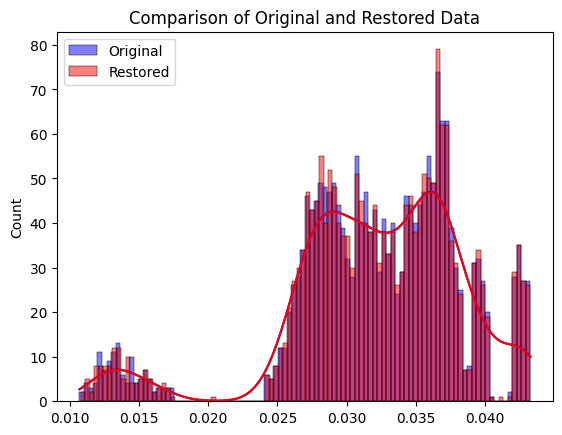

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_array, kde=True, bins=100, color='blue', label='Original')
sns.histplot(restored_data, kde=True, bins=100, color='red', label='Restored')
plt.legend()
plt.title("Comparison of Original and Restored Data")
plt.show()

In [21]:
import scipy.stats as stats

corr, _ = stats.pearsonr(df_array, restored_data)
print(f"df(Origin).shape: {df_array.shape}")
print(f"df(Normalized).shape: {df_test_array.shape}")
print(f"(Origin/Normalized)상관계수: {corr:.3f}")

df(Origin).shape: (2023,)
df(Normalized).shape: (2023,)
(Origin/Normalized)상관계수: 1.000


In [11]:
import scipy.stats as stats

corr, _ = stats.pearsonr(df_array, df_test_array)
print(f"df(Origin).shape: {df_array.shape}")
print(f"df(Normalized).shape: {df_test_array.shape}")
print(f"정규화 전후 상관계수: {corr:.3f}")

df(Origin).shape: (2023,)
df(Normalized).shape: (2023,)
정규화 전후 상관계수: 0.952


In [12]:
df_test_array

array([0.62328908, 1.14305492, 0.81383489, ..., 0.90920573, 0.93040061,
       0.7883896 ])

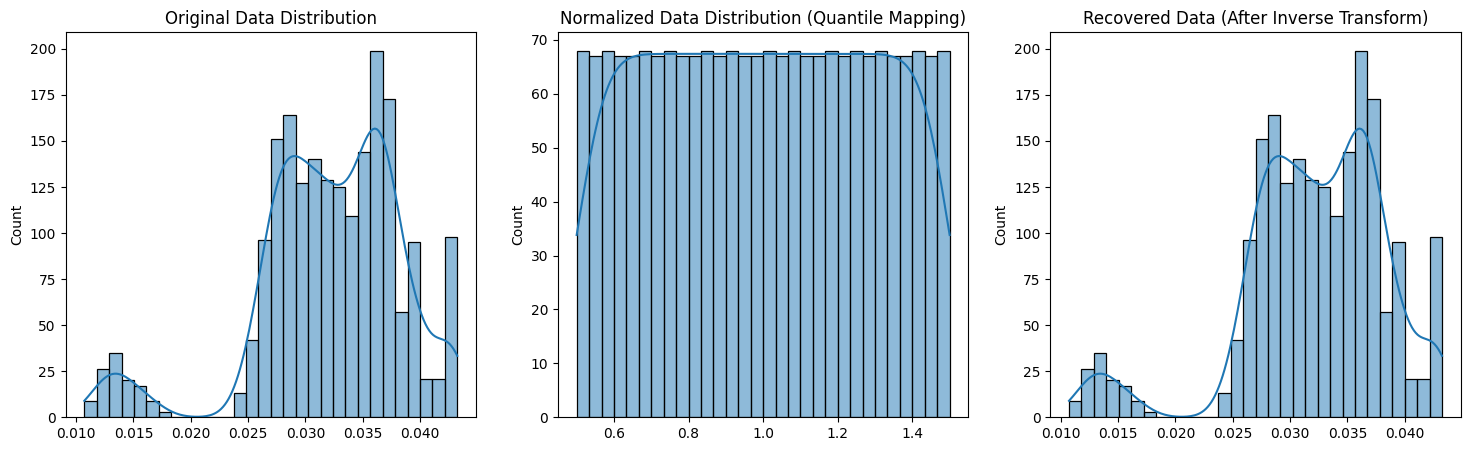

Original: min=0.011, max=0.043, mean=0.032
Recovered: min=0.011, max=0.043, mean=0.032


In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import rankdata
from sklearn.preprocessing import MinMaxScaler

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/home/user/workdir/o3_1.0_mean_renamed.csv')
df.reset_index(drop=True, inplace=True)
df_array = np.array(df).flatten()

# 2️⃣ 분위수 매핑 (Quantile Mapping) 적용
ranks = rankdata(df_array)  # 데이터 순위 계산 (1~N)
cdf_vals = ranks / len(df_array)  # CDF 값으로 변환

# 3️⃣ Min-Max Scaling 적용 (0.5 ~ 1.5 범위)
scaler = MinMaxScaler(feature_range=(0.5, 1.5))
normalized_data = scaler.fit_transform(cdf_vals.reshape(-1, 1)).flatten()

# 4️⃣ 역정규화: Min-Max 역변환 -> 분위수 역매핑
inverse_cdf_vals = scaler.inverse_transform(normalized_data.reshape(-1, 1)).flatten()
interp_func = interp1d(cdf_vals, df_array, kind="linear", fill_value="extrapolate")  # 선형 보간법 적용
recovered_data = interp_func(inverse_cdf_vals)  # 역변환 수행

# 🔹 원본 데이터 vs 복원 데이터 비교
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df_array, kde=True, bins=30, ax=ax[0])
ax[0].set_title("Original Data Distribution")

sns.histplot(normalized_data, kde=True, bins=30, ax=ax[1])
ax[1].set_title("Normalized Data Distribution (Quantile Mapping)")

sns.histplot(recovered_data, kde=True, bins=30, ax=ax[2])
ax[2].set_title("Recovered Data (After Inverse Transform)")

plt.show()

# 📌 통계 비교
print(f"Original: min={df_array.min():.3f}, max={df_array.max():.3f}, mean={df_array.mean():.3f}")
print(f"Recovered: min={recovered_data.min():.3f}, max={recovered_data.max():.3f}, mean={recovered_data.mean():.3f}")


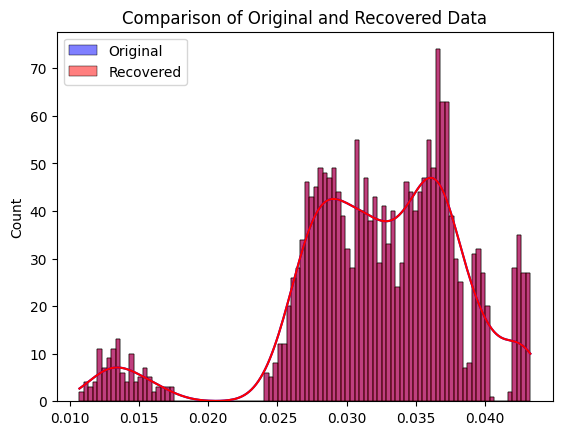

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_array, kde=True, bins=100, color='blue', label='Original')
sns.histplot(recovered_data, kde=True, bins=100, color='red', label='Recovered')
plt.legend()
plt.title("Comparison of Original and Recovered Data")
plt.show()

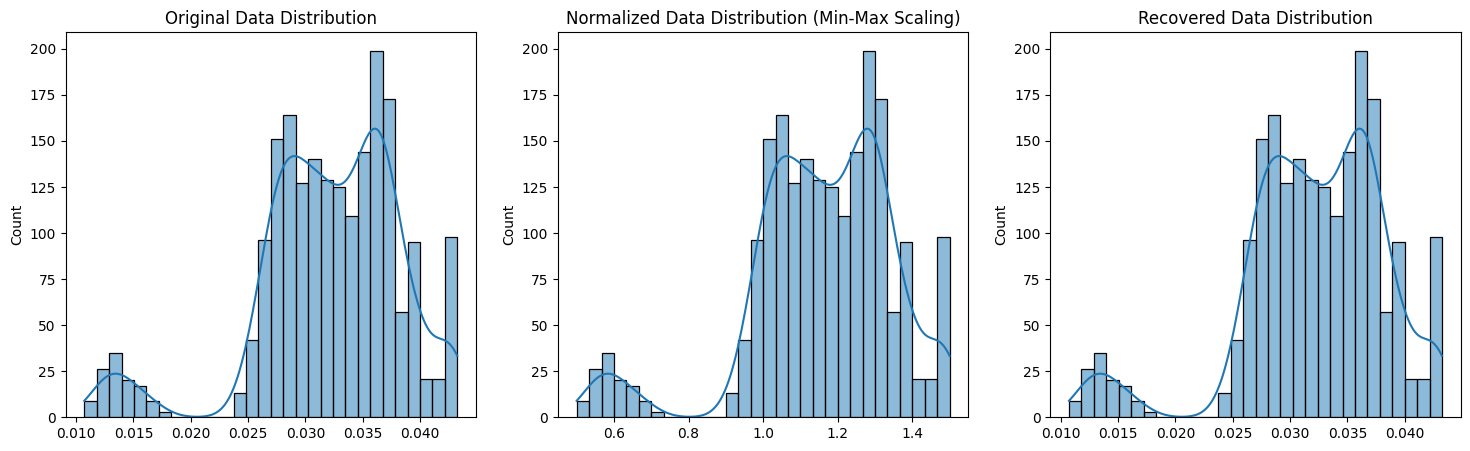

Original Data: min=0.011, max=0.043, mean=0.032
Normalized Data: min=0.500, max=1.500, mean=1.158
Recovered Data: min=0.011, max=0.043, mean=0.032


In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1️⃣ 데이터 불러오기
df = pd.read_csv('/home/user/workdir/o3_1.0_mean_renamed.csv')
df.reset_index(drop=True, inplace=True)
df_array = np.array(df).flatten()

# 2️⃣ Min-Max Scaling을 사용하여 0.5 ~ 1.5 범위로 정규화
scaler = MinMaxScaler(feature_range=(0.5, 1.5))  # 정규화 범위 설정 (0.5 ~ 1.5)
normalized_data = scaler.fit_transform(df_array.reshape(-1, 1)).flatten()

# 3️⃣ 역변환 (Inverse Transform)
recovered_data = scaler.inverse_transform(normalized_data.reshape(-1, 1)).flatten()

# 🔹 원본 데이터 vs 정규화 데이터 vs 복원 데이터 비교
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df_array, kde=True, bins=30, ax=ax[0])
ax[0].set_title("Original Data Distribution")

sns.histplot(normalized_data, kde=True, bins=30, ax=ax[1])
ax[1].set_title("Normalized Data Distribution (Min-Max Scaling)")

sns.histplot(recovered_data, kde=True, bins=30, ax=ax[2])
ax[2].set_title("Recovered Data Distribution")

plt.show()

# 📌 통계 비교
print(f"Original Data: min={df_array.min():.3f}, max={df_array.max():.3f}, mean={df_array.mean():.3f}")
print(f"Normalized Data: min={normalized_data.min():.3f}, max={normalized_data.max():.3f}, mean={normalized_data.mean():.3f}")
print(f"Recovered Data: min={recovered_data.min():.3f}, max={recovered_data.max():.3f}, mean={recovered_data.mean():.3f}")


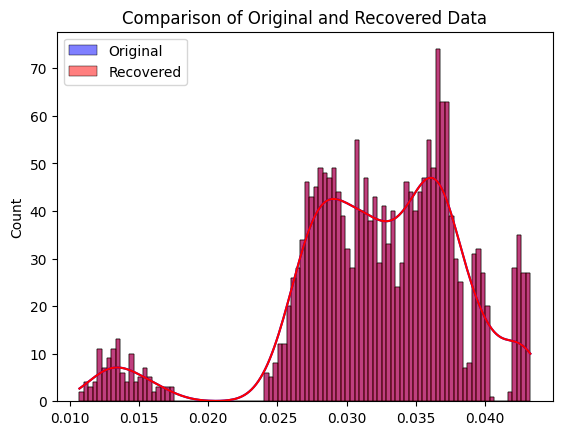

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_array, kde=True, bins=100, color='blue', label='Original')
sns.histplot(recovered_data, kde=True, bins=100, color='red', label='Recovered')
plt.legend()
plt.title("Comparison of Original and Recovered Data")
plt.show()

In [74]:
df_norm = pd.DataFrame(
    normalized_data.reshape(df.shape),  # (행,열) 복원
    index=df.index,                     # 원본 행 인덱스 유지
    columns=df.columns                  # 원본 열 이름/순서 유지
)

save_path = '/home/user/workdir/main/scaled_o3.csv'
df_norm.to_csv(save_path, index=False)
print(f"\nNormalized data saved to: {save_path}")


Normalized data saved to: /home/user/workdir/main/scaled_o3.csv


In [2]:
df_o3_renamed = pd.read_csv('/home/user/workdir/o3_1.0_mean_renamed.csv')
# df_o3_renamed = pd.read_csv('/home/user/workdir/main/normal_o3.csv')
# df_o3_renamed = pd.read_csv('/home/user/workdir/main/scaled_o3.csv')
if 'Unnamed: 0' in df_o3_renamed.columns:
    df_o3_renamed.drop(columns=['Unnamed: 0'], inplace=True)
df_pre = pd.read_csv('/home/user/workdir/main/resources/ctrl/precursor_control_2019.csv')

pre_cols = df_pre.columns.tolist()
# 예) ['A_NOX_ALL','A_SO2_ALL','A_NH3_ALL','A_VOC_ALL','A_PM25_ALL',
#      'B_NOX_ALL','B_SO2_ALL','B_NH3_ALL','B_VOC_ALL','B_PM25_ALL', ... ]

# 지역 목록(17개) → A~Q
regions = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q"]

# (5) 각 지역별로 '~~_PM25_ALL' 뒤에 '~~_O3_ALL' 컬럼을 삽입
for region in regions:
    # (a) 삽입할 새로운 컬럼 이름
    new_col = f"{region}_O3_ALL"  # 예: 'A_O3_ALL'
    
    # (b) precursor에서 'region_PM25_ALL' 컬럼 인덱스 찾기
    pm25_col = f"{region}_PM25_ALL"
    if pm25_col not in pre_cols:
        # 만약 precursor에 해당 PM25컬럼이 없으면 스킵 or 에러 처리
        print(f"Warning: {pm25_col} not found in precursor columns.")
        continue
    
    idx_pm25 = pre_cols.index(pm25_col)  # PM25 컬럼의 위치(정수)
    
    # (c) PM25 바로 뒤에 삽입할 위치 = idx_pm25 + 1
    insert_pos = idx_pm25 + 1
    
    # (d) O3 데이터( df_o3_renamed[new_col] )를 df_pre에 컬럼으로 삽입
    #     - np.array 길이(=119)와 df_pre의 행 수가 같아야 함
    df_pre.insert(
        loc = insert_pos,           # 삽입할 열 위치
        column = new_col,           # 새 컬럼명
        value = df_o3_renamed[new_col].values  # 오존 데이터 Series(또는 array)
    )
    
    # (e) pre_cols 리스트에도 새 컬럼명을 같은 위치에 삽입
    pre_cols.insert(insert_pos, new_col)

# (6) 저장
df_pre.iloc[0] = 1
if 'Unnamed: 0' in df_pre.columns:
    df_pre.drop(columns=['Unnamed: 0'], inplace=True)
df_pre.to_csv('/home/user/workdir/precursor_control_2019_o3.csv', index=False)

In [76]:
df = pd.read_csv('/home/user/workdir/main/resources/ctrl/precursor_control_2019_with_scaled_o3.csv')
df

,A_NOX_ALL,A_SO2_ALL,A_VOC_ALL,A_NH3_ALL,A_PM25_ALL,A_O3_ALL,B_NOX_ALL,B_SO2_ALL,B_VOC_ALL,B_NH3_ALL,...,P_VOC_ALL,P_NH3_ALL,P_PM25_ALL,P_O3_ALL,Q_NOX_ALL,Q_SO2_ALL,Q_VOC_ALL,Q_NH3_ALL,Q_PM25_ALL,Q_O3_ALL
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.863536,0.700099,1.241056,0.833703,0.812254,0.556765,0.869754,0.796407,1.006564,0.962918,...,1.121575,0.902626,0.901955,1.156815,0.657383,1.139638,1.010165,1.315283,0.591438,1.056473
2,0.742006,0.983985,0.646946,0.986340,0.956668,0.615701,1.192631,0.832971,1.003773,0.780494,...,1.284151,1.433524,1.372564,1.070437,1.120913,0.763423,0.824734,1.290492,1.083136,1.000229
3,1.242453,0.920476,1.263960,0.903860,1.061871,0.577561,0.955693,1.146790,0.973506,0.906026,...,1.163494,1.079287,1.086030,1.114272,1.145995,1.079256,1.265949,0.777755,1.212820,0.971751
4,0.814413,1.074629,0.735800,0.644385,0.682861,0.677327,1.089342,0.986736,1.144006,1.188025,...,0.868594,0.953091,1.067506,1.077379,1.196717,1.317486,0.776720,1.122029,1.126078,1.010075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.637726,0.623853,1.277424,1.161813,0.999322,0.649552,1.338111,1.126068,0.680149,0.718203,...,1.078804,1.119066,0.995012,1.147235,1.270025,1.163085,0.775742,0.922857,1.157404,1.039778
115,0.964623,0.645136,0.669842,1.231076,1.175551,0.692951,0.848685,0.920326,0.912572,1.086990,...,0.873848,0.698095,0.824039,1.134437,1.115707,1.233914,1.026594,0.664581,1.191756,1.098575
116,0.878997,0.964736,1.100528,1.000417,0.917413,0.587315,0.616271,0.832265,0.970286,0.975696,...,0.881093,0.863391,1.007772,1.077063,1.264429,0.935599,1.006009,1.170412,1.044425,0.967776
117,0.894946,1.035694,0.816513,0.883055,0.879394,0.684486,0.915738,0.882485,0.947299,1.115599,...,1.113508,0.992845,0.975551,1.142653,1.253173,1.295791,1.164553,1.272193,1.253177,1.011720


<Figure size 1200x600 with 0 Axes>

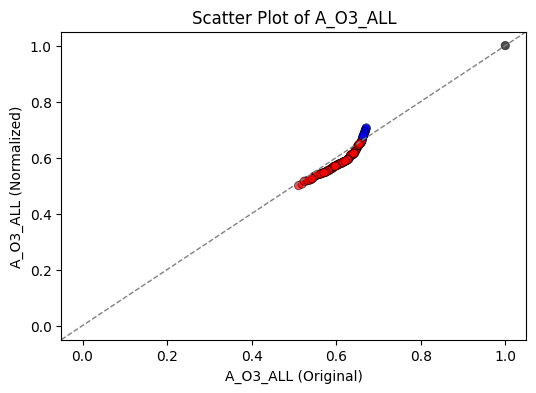

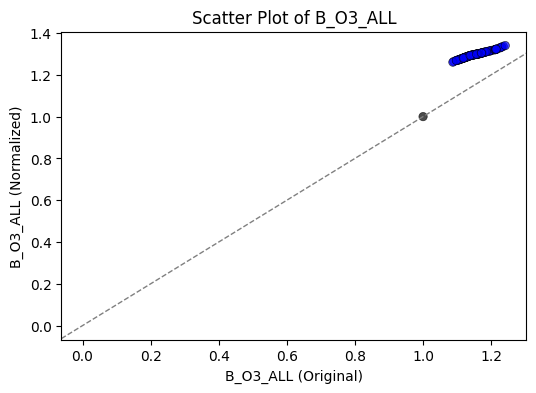

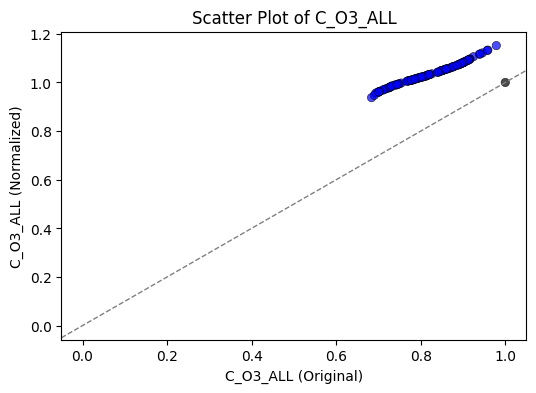

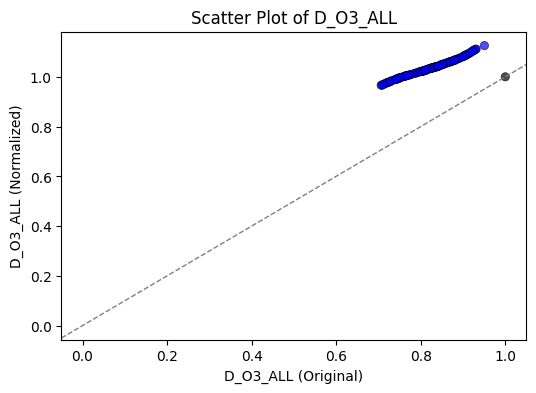

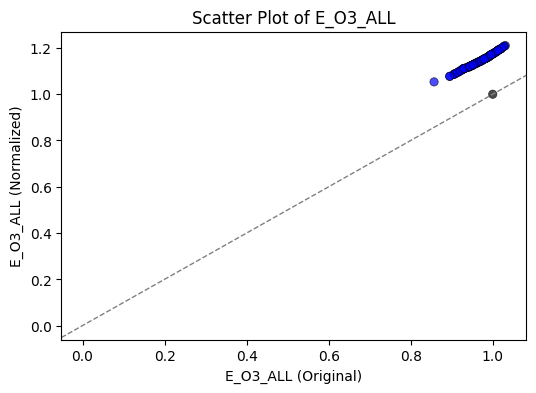

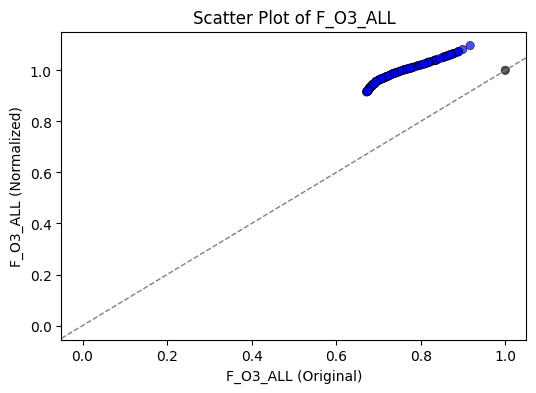

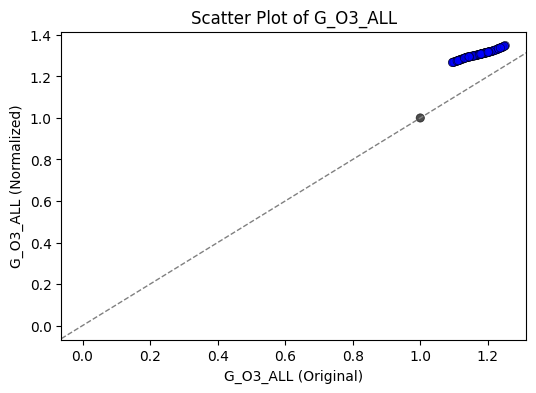

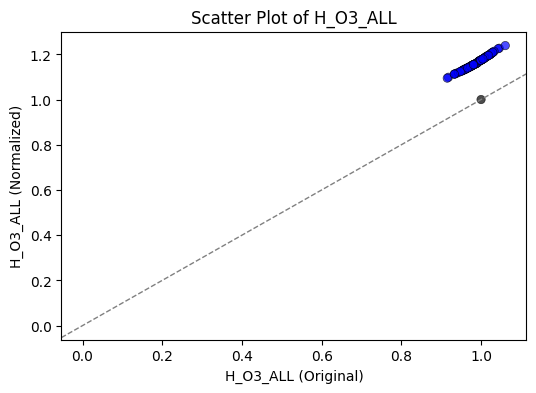

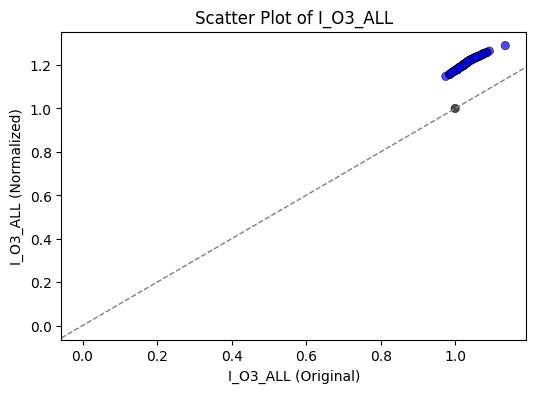

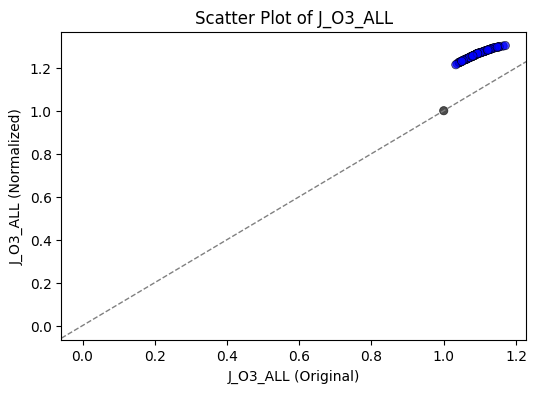

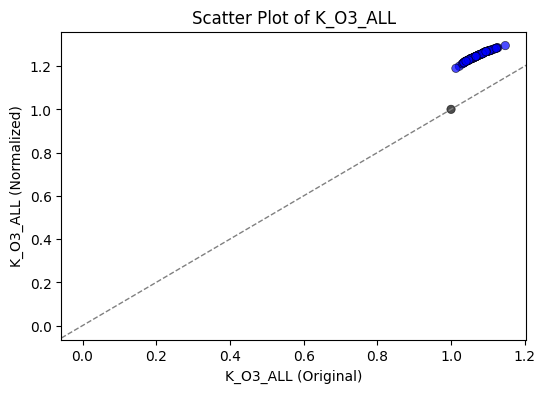

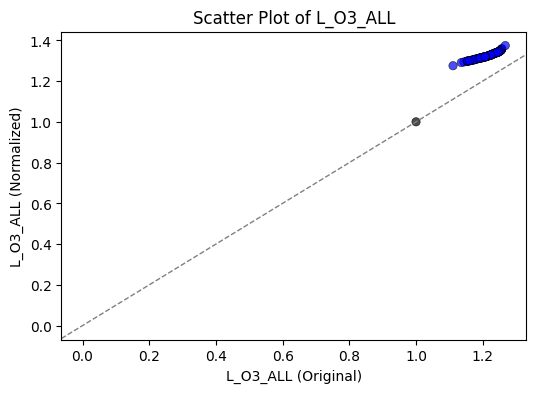

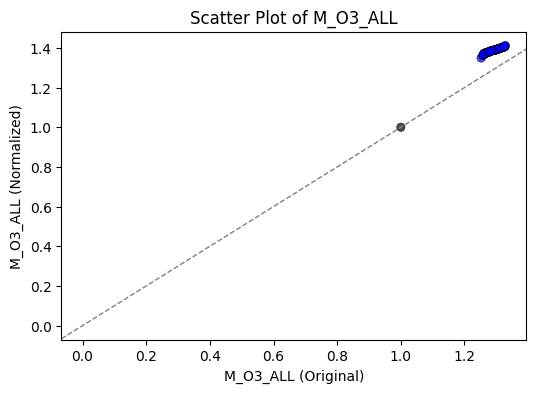

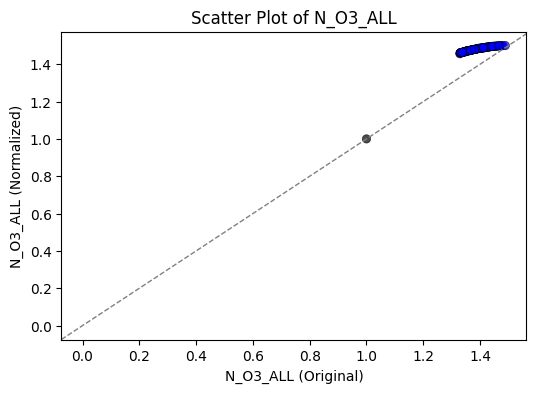

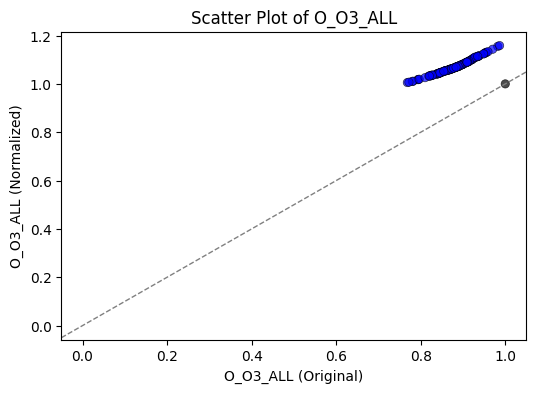

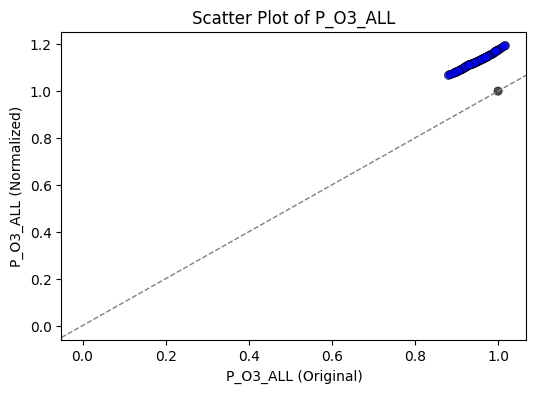

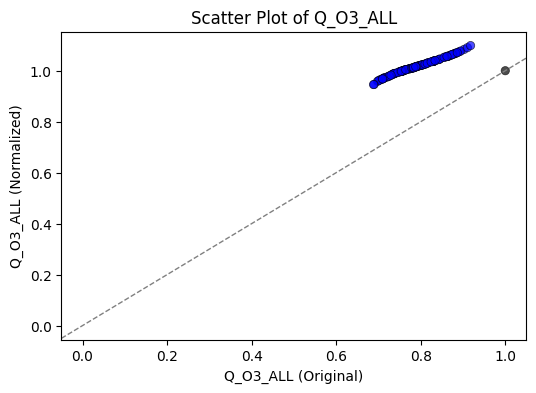

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ CSV 파일 로드
file1 = "/home/user/workdir/main/resources/ctrl/precursor_control_2019_3input_o3.csv"
file2 = "/home/user/workdir/main/resources/ctrl/precursor_control_2019_3input_scaled_o3.csv"

df1 = pd.read_csv(file1)  # 원본 데이터
df2 = pd.read_csv(file2)  # 정규화된 데이터

# 2️⃣ 특정 속성(XXX_O3_ALL) 필터링
o3_columns = [col for col in df1.columns if "_O3_ALL" in col]  # O3 관련 컬럼만 선택
df1 = df1[o3_columns]
df2 = df2[o3_columns]

# 3️⃣ 속성별 산점도 시각화
plt.figure(figsize=(12, 6))

for column in o3_columns:
    plt.figure(figsize=(6, 4))
    
    # 산점도 색상 조건 (df1 > df2 → 빨간색, df1 < df2 → 파란색, df1 == df2 → 검정색)
    colors = np.where(df1[column] > df2[column], 'red', np.where(df1[column] < df2[column], 'blue', 'black'))

    plt.scatter(df1[column], df2[column], c=colors, alpha=0.7, edgecolors="k", linewidth=0.5)
    
    plt.xlabel(f"{column} (Original)")
    plt.ylabel(f"{column} (Normalized)")
    plt.title(f"Scatter Plot of {column}")
    
    plt.axline((0, 0), slope=1, color='gray', linestyle='--', linewidth=1)  # y=x 기준선 추가
    
    plt.show()


In [ ]:
comparison_stats

,Mean (Original),Mean (Comparison),Mean Difference,Variance (Original),Variance (Comparison),Variance Difference
H_NOX_ALL,0.992547,0.992547,0.000000,0.038540,0.038540,0.000000
E_NOX_ALL,0.985885,0.985885,0.000000,0.045203,0.045203,0.000000
F_O3_ALL,0.760288,0.992814,0.232525,0.005416,0.002148,0.003268
E_NH3_ALL,0.979357,0.979357,0.000000,0.025392,0.025392,0.000000
O_VOC_ALL,0.991591,0.991591,0.000000,0.034005,0.034005,0.000000
...,...,...,...,...,...,...
P_NH3_ALL,1.025134,1.025134,0.000000,0.066253,0.066253,0.000000
B_NOX_ALL,1.003876,1.003876,0.000000,0.036087,0.036087,0.000000
C_O3_ALL,0.824477,1.035630,0.211153,0.005476,0.002010,0.003466
G_NOX_ALL,1.012436,1.012436,0.000000,0.033740,0.033740,0.000000


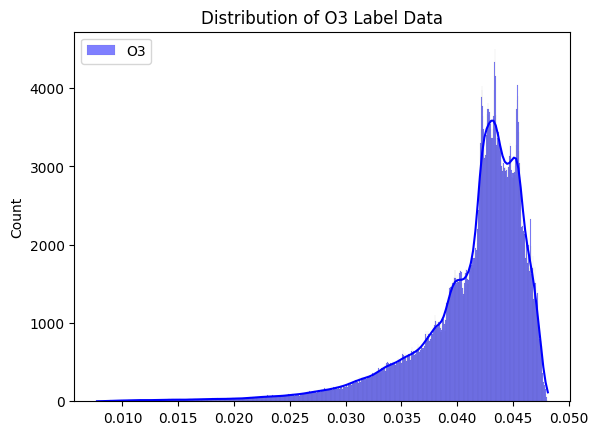

In [17]:
import os
import sys
sys.path.append('/home/user/workdir/CMAQ_Emulator/main')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import netCDF4 as nc

import geopandas as gpd
from shapely.geometry import Point
import matplotlib as mpl

label_path_2013 = '/home/user/workdir/CMAQ_Emulator/main/datasets/concentration/2013'
label_path = []
for i in range(1, 120): 
    label_path.append(os.path.join(label_path_2013, '1.00', f'ACONC.{i}'))
label_data = []
for path in label_path:
    with nc.Dataset(path) as f:
        label_data.append(f.variables['O3'][:].data.squeeze())  # ncf 파일 내 목적변수를 지정 
label_data = np.array(label_data).reshape(len(label_data), 82, 67, 1)

o3 = label_data.squeeze()
o3_dist = o3.reshape(-1)

sns.histplot(o3_dist, kde=True, bins=1000, color='blue', label='O3')
plt.legend()
plt.title("Distribution of O3 Label Data")
plt.show()

In [23]:
print(max(o3_dist))
print(min(o3_dist))

0.048116285
0.007714576


In [19]:
# 2D Map 결과 도출을 위한 지도 파라미터 세팅
proj = '+proj=lcc +lat_1=30 +lat_2=60 +lon_1=126 +lat_0=38 +lon_0=126 +ellps=GRS80 +units=m'
atob = {
    0: 'G', 1: 'F', 2: 'K', 3: 'J', 4: 'E', 5: 'D',
    6: 'O', 7: 'C', 8: 'A', 9: 'Q', 10: 'P', 11: 'B',
    12: 'M', 13: 'L', 14: 'N', 15: 'I', 16: 'H'}
region_columns = {
    'A': 'Seoul City', 'B': 'Incheon City', 'C': 'Busan City', 'D': 'Daegu City',
    'E': 'Gwangju City', 'F': 'Gyeonggi-do', 'G': 'Gangwon-do', 'H': 'Chungbuk-do',
    'I': 'Chungnam-do', 'J': 'Gyeongbuk-do', 'K': 'Gyeongnam-do', 'L': 'Jeonbuk-do',
    'M': 'Jeonnam-do', 'N': 'Jeju-do', 'O': 'Daejeon City', 'P': 'Ulsan City', 'Q': 'Sejong City'}

def get_ctprvn_map() -> gpd.GeoDataFrame:
    path = '/home/user/workdir/CMAQ_Emulator/main/resources/geom/ctp_rvn.shp'
    ctprvn = gpd.GeoDataFrame.from_file(path, encoding='cp949')
    ctprvn.crs = 'EPSG:5179'
    return ctprvn

def get_base_raster(ctprvn:gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    points = [Point(i, j)
                for i in range(-180000, -180000 + 9000 * 67, 9000)
                for j in range(-585000, -585000 + 9000 * 82, 9000)]
    grid_data = gpd.GeoDataFrame(points, geometry='geometry', columns=['geometry'])
    grid_data.crs = ctprvn.to_crs(proj).crs
    grid_data.loc[:,'x_m'] = grid_data.geometry.x
    grid_data.loc[:,'y_m'] = grid_data.geometry.y
    grid_data.loc[:,'value'] = 0
    grid_data.loc[:,'index'] = grid_data.index
    return grid_data

def get_region_pixel_indices() -> list:
    ctprvn = get_ctprvn_map()
    grid_data = get_base_raster(ctprvn)

    cities = {
        0: '강원도', 1: '경기도', 2: '경상남도', 3: '경상북도',
        4: '광주광역시', 5: '대구광역시', 6: '대전광역시', 7: '부산광역시',
        8: '서울특별시', 9: '세종특별자치시', 10: '울산광역시', 11: '인천광역시',
        12: '전라남도', 13: '전라북도', 14: '제주특별자치도', 15: '충청남도',
        16: '충청북도'
    }

    gdf_joined_loc = ['CTPRVN_CD', 'CTP_ENG_NM', 'CTP_KOR_NM', 'index_right0']
    gdf_joined = gpd.sjoin(ctprvn, grid_data.to_crs(5179), predicate='contains')

    indices = gpd.GeoDataFrame(pd.merge(
        left=grid_data, right=gdf_joined.loc[:,gdf_joined_loc], 
        how='left', left_on='index', right_on='index_right0'
    ), geometry='geometry').dropna()
    pixel_indices = \
        [[(idx%82, idx//82) for idx in indices.loc[indices.CTP_KOR_NM==cities[region]].index.tolist()]
         for region, _ in cities.items()]
    return pixel_indices

ctprvn = get_ctprvn_map()
ctprvn_proj = ctprvn.to_crs(proj)

# 건국대(서울대)에서 제공한 대한민국 국토 grid 정보
grid_alloc = (
    pd.read_csv('/home/user/workdir/CMAQ_Emulator/main/resources/geom/grid_allocation.csv') # load grid allocation data
    .sort_values(by=['Row', 'Column', 'Ratio'], ascending=[True, True, False]) # sort by row, column, ratio
    .drop_duplicates(subset=['Row', 'Column'], keep='first') # drop duplicates
    .reset_index(drop=True) # reset index
)

# 정부에서 배포하는 대한민국 국토 grid 정보
pixel_indices = get_region_pixel_indices()
total_index = []
for idx, grids in enumerate(pixel_indices):
    for grid in grids:
        total_index.append([
            grid[1], grid[0], 100.0, atob[idx], region_columns[atob[idx]]
        ])
total_index = pd.DataFrame(total_index, columns=grid_alloc.columns)

# 두 기관에서 주는 grid에 한두픽셀씩 비어있는 부분이 있어, 두 기관 데이터를 모두 참조하여 중복되는 픽셀을 정리 후 최종 국토 grid 정보를 취득
grid_alloc = pd.concat([
    grid_alloc.drop(columns=['Ratio', 'Region_Name']),
    total_index.drop(columns=['Ratio', 'Region_Name'])
]).sort_values(by=['Region_Code']).drop_duplicates().reset_index(drop=True)
grid_alloc[['Row', 'Column']] = grid_alloc[['Row', 'Column']] - 1

row_indices, col_indices = zip(*grid_alloc[['Row', 'Column']].values)
offset_x, offset_y = 4500, 4500 # 지도 위치 맞추기

# 마스킹 처리
mask = np.zeros((82, 67))
mask[row_indices, col_indices] = 1

cmap_white = mpl.colormaps['jet']
cmap_white.set_under('white')

In [20]:
mask_expanded = np.repeat(mask[np.newaxis, :, :], repeats=o3.shape[0], axis=0) # (24, 82, 67)

pred_conc_map_w_lines = np.where(mask_expanded == 1, o3, 0)  # 마스킹 적용
true_conc_map_w_lines = np.where(mask_expanded == 1, o3, 0) # 마스킹 적용

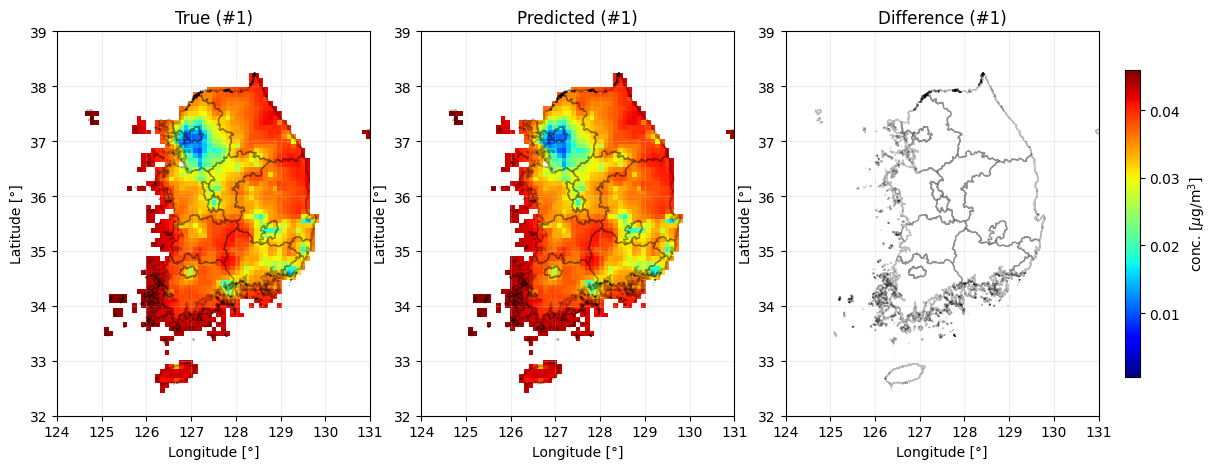

In [24]:
cmap_with_white = plt.get_cmap('jet').copy()   # 예: jet 컬러맵 복사
cmap_with_white.set_bad('white')               # 마스킹된 부분을 흰색으로

def plot_prediction_loss(y_true, y_pred, num_samples=1, indices=-1):
    if indices == -1 or indices < 0:
        indices = np.random.choice(len(y_true), num_samples, replace=False)
    else:
        index = indices
        indices = [index]
    
    # (예시) "선택된 인덱스들"만 고려한 local_min/local_max
    local_min = min(y_true[indices].min(), y_pred[indices].min())
    local_max = max(y_true[indices].max(), y_pred[indices].max())
    local_diff = np.abs(y_true[indices] - y_pred[indices])
    local_max = max(local_max, local_diff.max())

    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5 * num_samples))
    if num_samples == 1:
        axes = axes[np.newaxis, :]  # (1, 3) 형태로 맞춤

    # 지도 투영 좌표 범위
    x_min = -180000 + offset_x
    x_max =  414000 + offset_x
    y_min = -585000 + offset_y
    y_max =  144000 + offset_y

    x_ticks = np.linspace(x_min, x_max, 8)
    x_labels = [str(i) for i in range(124, 132)]
    y_ticks = np.linspace(y_min, y_max, 8)
    y_labels = [str(i) for i in range(32, 40)]

    # "0 이하이면 흰색"으로 표시하고 싶다면:
    threshold = 0.0005  # 또는 원하는 임계값(예: local_min 등)

    for i, idx in enumerate(indices):
        # (A) True 데이터
        data_true = y_true[idx][::-1]
        # 2) 마스킹: threshold 이하 부분을 마스크
        masked_true = np.ma.masked_where(data_true <= threshold, data_true)
        
        im_true = axes[i, 0].imshow(
            masked_true,
            cmap=cmap_with_white,          # 마스킹 컬러맵
            extent=(x_min, x_max, y_min, y_max),
            vmin=threshold,                # 컬러 스케일 최소
            vmax=local_max                 # 컬러 스케일 최대
        )
        ctprvn_proj.boundary.plot(
            ax=axes[i, 0], edgecolor='black', facecolor='none', linewidth=1, alpha=0.25
        )
        axes[i, 0].set_title(f"True (#{idx})")
        axes[i, 0].set_xlabel('Longitude [°]')
        axes[i, 0].set_ylabel('Latitude [°]')
        axes[i, 0].set_xlim(x_min, x_max)
        axes[i, 0].set_ylim(y_min, y_max)
        axes[i, 0].set_xticks(x_ticks)
        axes[i, 0].set_yticks(y_ticks)
        axes[i, 0].set_xticklabels(x_labels)
        axes[i, 0].set_yticklabels(y_labels)
        axes[i, 0].grid(alpha=0.25, color='silver')

        # (B) Predicted
        data_pred = y_pred[idx][::-1]
        masked_pred = np.ma.masked_where(data_pred <= threshold, data_pred)

        im_pred = axes[i, 1].imshow(
            masked_pred,
            cmap=cmap_with_white,
            extent=(x_min, x_max, y_min, y_max),
            vmin=threshold,
            vmax=local_max
        )
        ctprvn_proj.boundary.plot(
            ax=axes[i, 1], edgecolor='black', facecolor='none', linewidth=1, alpha=0.25
        )
        axes[i, 1].set_title(f"Predicted (#{idx})")
        axes[i, 1].set_xlabel('Longitude [°]')
        axes[i, 1].set_ylabel('Latitude [°]')
        axes[i, 1].set_xlim(x_min, x_max)
        axes[i, 1].set_ylim(y_min, y_max)
        axes[i, 1].set_xticks(x_ticks)
        axes[i, 1].set_yticks(y_ticks)
        axes[i, 1].set_xticklabels(x_labels)
        axes[i, 1].set_yticklabels(y_labels)
        axes[i, 1].grid(alpha=0.25, color='silver')

        # (C) Difference
        data_diff = np.abs(y_true[idx] - y_pred[idx])[::-1]
        masked_diff = np.ma.masked_where(data_diff <= threshold, data_diff)

        im_diff = axes[i, 2].imshow(
            masked_diff,
            cmap=cmap_with_white,
            extent=(x_min, x_max, y_min, y_max),
            vmin=threshold,
            vmax=local_max
        )
        ctprvn_proj.boundary.plot(
            ax=axes[i, 2], edgecolor='black', facecolor='none', linewidth=1, alpha=0.25
        )
        axes[i, 2].set_title(f"Difference (#{idx})")
        axes[i, 2].set_xlabel('Longitude [°]')
        axes[i, 2].set_ylabel('Latitude [°]')
        axes[i, 2].set_xlim(x_min, x_max)
        axes[i, 2].set_ylim(y_min, y_max)
        axes[i, 2].set_xticks(x_ticks)
        axes[i, 2].set_yticks(y_ticks)
        axes[i, 2].set_xticklabels(x_labels)
        axes[i, 2].set_yticklabels(y_labels)
        axes[i, 2].grid(alpha=0.25, color='silver')

    # 서브플롯 간격/레이아웃 조정
    plt.subplots_adjust(wspace=-0.4, hspace=0.2)
    plt.tight_layout(rect=[0, 0, 0.88, 0.96])

    # (3) 단일 컬러바
    cbar = fig.colorbar(
        im_true,
        ax=axes.ravel().tolist(),
        orientation='vertical',
        fraction=0.03,
        pad=0.02,
        shrink=0.8
    )
    cbar.set_label('conc. [$\\mu \\mathrm{g}/\\mathrm{m}^3$]')

    plt.show()

plot_prediction_loss(true_conc_map_w_lines, pred_conc_map_w_lines, indices=1)